In [1]:
"""
This program reads spectrum iteration and plots bias vs full width half maximum 
"""

import ROOT as r
import numpy as np
import matplotlib.pyplot as plt
import math

#creates a directory
def mkdir_p(mypath):

    from errno import EEXIST
    from os import makedirs,path

    try:
        makedirs(mypath)
    except OSError as exc: 
        if exc.errno == EEXIST and path.isdir(mypath):
            pass
        else: raise
            
def FWHM(function):
    #Annullo il fondo
    function.SetParameter(3,0)
    function.SetParameter(4,0)
    function.SetParameter(5,0)
    mean = function.GetParameter(1)

    maxi = function.GetMaximum()
    Xmax = function.GetMaximumX()
    temp = Xmax
    estremo_sx = 0
    estremo_dx = 0
    epsilon = 0.0001

    #Determino l'estremo sinistro
    while(1):
        if function.Eval(temp) < maxi/2:
            estremo_sx = temp
            break

        temp -= epsilon

    temp = Xmax

    #Determino l'estremo destro
    while(1):
        if function.Eval(temp) < maxi/2:
            estremo_dx = temp
            break
        temp += epsilon
    return (estremo_dx - estremo_sx)
            
#Function which compute the percentage resolution as FWHM/mean*100
def Resolution(function):
    
    #Annullo il fondo
    function.SetParameter(3,0)
    function.SetParameter(4,0)
    mean = function.GetParameter(1)

    maxi = function.GetMaximum()
    Xmax = function.GetMaximumX()
    temp = Xmax
    estremo_sx = 0
    estremo_dx = 0
    epsilon = 0.0001

    #Determino l'estremo sinistro
    while(1):
        if function.Eval(temp) < maxi/2:
            estremo_sx = temp
            break

        temp -= epsilon

    temp = Xmax

    #Determino l'estremo destro
    while(1):
        if function.Eval(temp) < maxi/2:
            estremo_dx = temp
            break
        temp += epsilon

    return (estremo_dx - estremo_sx)*100/mean

def Res_Error(function, fwhm):
    mean = function.GetParameter(1)
    err_mean = function.GetParError(1)
    err_sigma = function.GetParError(2)
    err_fwhm = 2.355*err_sigma
    
    return 100*math.sqrt(((1/mean)**2)*err_fwhm**2+((fwhm/mean**2)**2)*err_mean**2)

def Plotter(f):
    f = open(f, "r")
    lists = f.readlines()
    value = []
    for i in lists:
        value.append(i.strip())
    value = list(map(int,value))
    n = np.arange(0,1002,1)
    plt.plot(n,value)

data = str(181128)

Welcome to JupyROOT 6.14/06


In [2]:
"""f = open("/home/giacomo/lab/0.txt", "r")
lists = f.readlines()
value = []
for i in lists:
    value.append(i.strip())
value = list(map(int,value))
n = np.arange(0,1002,1)
print(n)
plt.plot(n,value)
"""

'f = open("/home/giacomo/lab/0.txt", "r")\nlists = f.readlines()\nvalue = []\nfor i in lists:\n    value.append(i.strip())\nvalue = list(map(int,value))\nn = np.arange(0,1002,1)\nprint(n)\nplt.plot(n,value)\n'

In [3]:
OOS_Resolutions = []
OOS_Errors = []

# Left Scintillator (0)

 First spectrum

92
integral 146802
 FCN=393450 FROM MIGRAD    STATUS=CALL LIMIT   1633 CALLS        1634 TOTAL
                     EDM=8.61086    STRATEGY= 1  ERROR MATRIX UNCERTAINTY  20.5 per cent
  EXT PARAMETER                APPROXIMATE        STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0          -2.11490e+05   3.45447e+03  -2.71512e+03   9.57480e-03
   2  p1           1.78512e+02   9.42198e-01   7.72730e-01   1.76301e+02
   3  p2           4.63611e+01   5.94562e-01   6.12059e-01  -3.06285e+02
   4  p3           5.15061e+02   6.57702e+00   1.08131e+01   2.33841e+01
   5  p4          -3.50060e+04   4.08326e+02  -6.98931e+02   2.50811e-01
                               ERR DEF= 0.5


Warning in <Fit>: Abnormal termination of minimization.


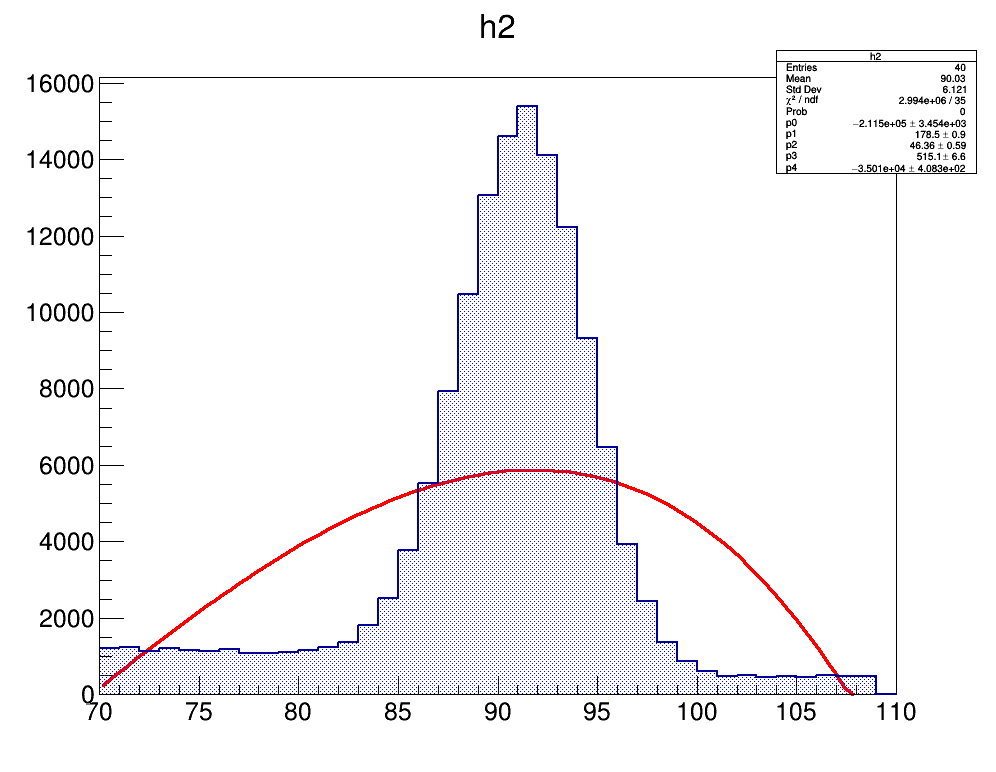

In [9]:
f = open("/Users/boldrinicoder/lab4/data/{}/{}20.txt".format(data,data), "r")
lists = f.readlines()
value = []
for i in lists:
    value.append(i.strip())
value = list(map(int,value))

#Plotter("/home/giacomo/lab/data/{}/{}01.txt".format(data,data))

#set this manually
sup = 110
inf = 70
bins = sup-inf
peak = value.index(max(value))
print(peak)
h2 = r.TH1F("h2", "h2", bins, inf, sup)
h2.SetFillColor(r.kBlue)
h2.SetFillStyle(3003)
h2.SetLineWidth(2)
i = inf
z = 0
fit = r.TF1("fit", "[0]*exp(-((x[0]-[1])^2)/[2]^2)+[3]*x[0]+[4]",inf,sup)
fit.SetParameters(2200,110,18,300,200,110)
fit.SetLineWidth(3)
while i < sup:
    h2.SetBinContent(z,value[i])
    i += 1 
    z += 1
integral = 0
for i in value[inf:sup]:
    integral += i
print("integral {}".format(integral))
c2 = r.TCanvas("c2", "c2",50,50,1000,800)
h2.Fit("fit", "RL")
h2.Draw("histo same")
r.gStyle.SetOptStat(1111)
r.gStyle.SetOptFit(1111)
c2.Draw() 


 Second spectrum

110
integral 139941
 FCN=41919.2 FROM MIGRAD    STATUS=CALL LIMIT   1641 CALLS        1642 TOTAL
                     EDM=225.327    STRATEGY= 1      ERR MATRIX NOT POS-DEF
  EXT PARAMETER                APPROXIMATE        STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           2.44926e+04   4.72160e+01   2.06795e+02  -7.70327e+00
   2  p1           1.17892e+02   4.99295e-02  -1.82398e-01  -2.12027e+02
   3  p2           3.64948e+01   2.72824e-02   3.10033e-02  -1.42871e+03
   4  p3          -2.30927e+02   1.69713e+00  -2.88261e-01  -1.05452e+03
   5  p4           7.20021e+03   1.68130e+02  -1.44044e+02  -8.98622e+00
                               ERR DEF= 0.5


Warning in <TROOT::Append>: Replacing existing TH1: h2 (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2
Warning in <Fit>: Abnormal termination of minimization.


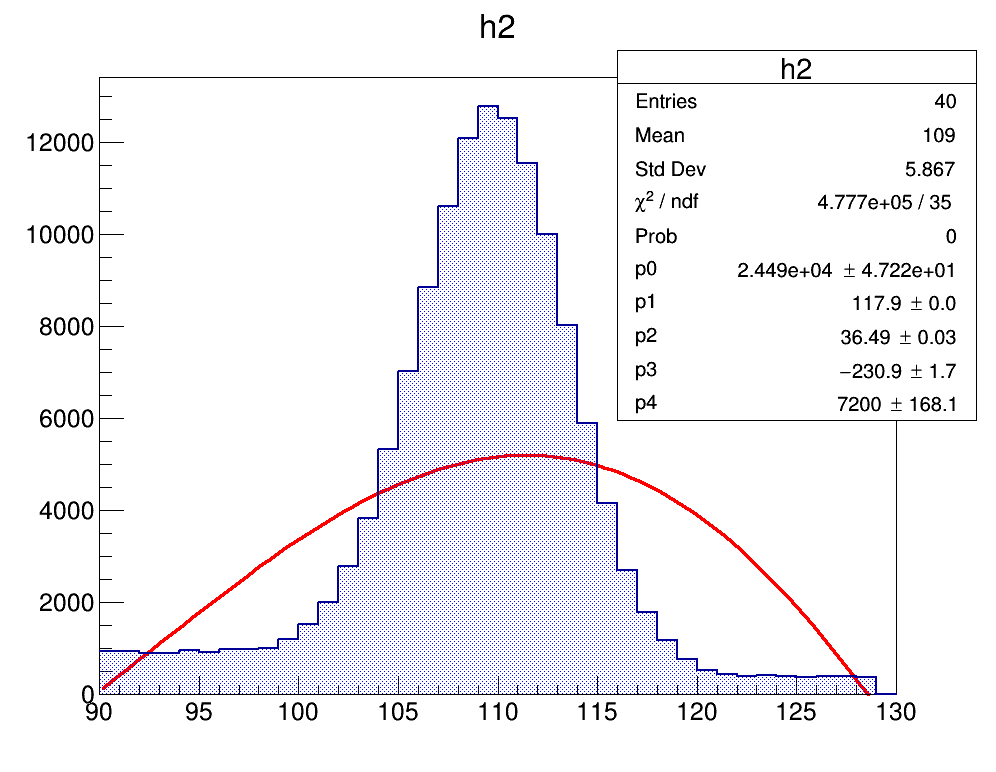

In [11]:
f = open("/Users/boldrinicoder/lab4/data/{}/{}21.txt".format(data,data), "r")
lists = f.readlines()
value = []
for i in lists:
    value.append(i.strip())
value = list(map(int,value))


sup = 130
inf = 90
bins = sup-inf
peak = value.index(max(value))
print(peak)
h2 = r.TH1F("h2", "h2", bins, inf, sup)
h2.SetFillColor(r.kBlue)
h2.SetFillStyle(3003)
h2.SetLineWidth(2)
i = inf
z = 0
fit = r.TF1("fit", "[0]*exp(-((x[0]-[1])^2)/[2]^2)+[3]*x[0]+[4]",inf,sup)
fit.SetParameters(2200,354,18,0,1)
fit.SetLineWidth(3)
while i < sup:
    h2.SetBinContent(z,value[i])
    i += 1 
    z += 1
integral = 0
for i in value[inf:sup]:
    integral += i
print("integral {}".format(integral))
c2 = r.TCanvas("c2", "c2",50,50,1000,800)
h2.Fit("fit", "RL")
h2.Draw("histo same")
r.gStyle.SetOptStat(1111)
r.gStyle.SetOptFit(1111)
c2.Draw() 

# Third spectrum

164
integral 160440
 FCN=412.132 FROM MIGRAD    STATUS=CONVERGED    1156 CALLS        1157 TOTAL
                     EDM=6.57333e-07    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   4.3 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           8.68488e+03   3.35474e+01   5.26151e-01   2.18300e-05
   2  p1           1.62950e+02   1.85103e-02   2.07162e-04   1.77361e-02
   3  p2           7.78258e+00   2.31042e-02  -1.35126e-04   5.14593e-02
   4  p3          -7.76916e+00   1.06406e-01   2.18478e-03   4.21832e-03
   5  p4           1.74056e+03   1.86272e+01  -3.36491e-01   5.22603e-05
                               ERR DEF= 0.5


Warning in <TROOT::Append>: Replacing existing TH1: h2 (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2


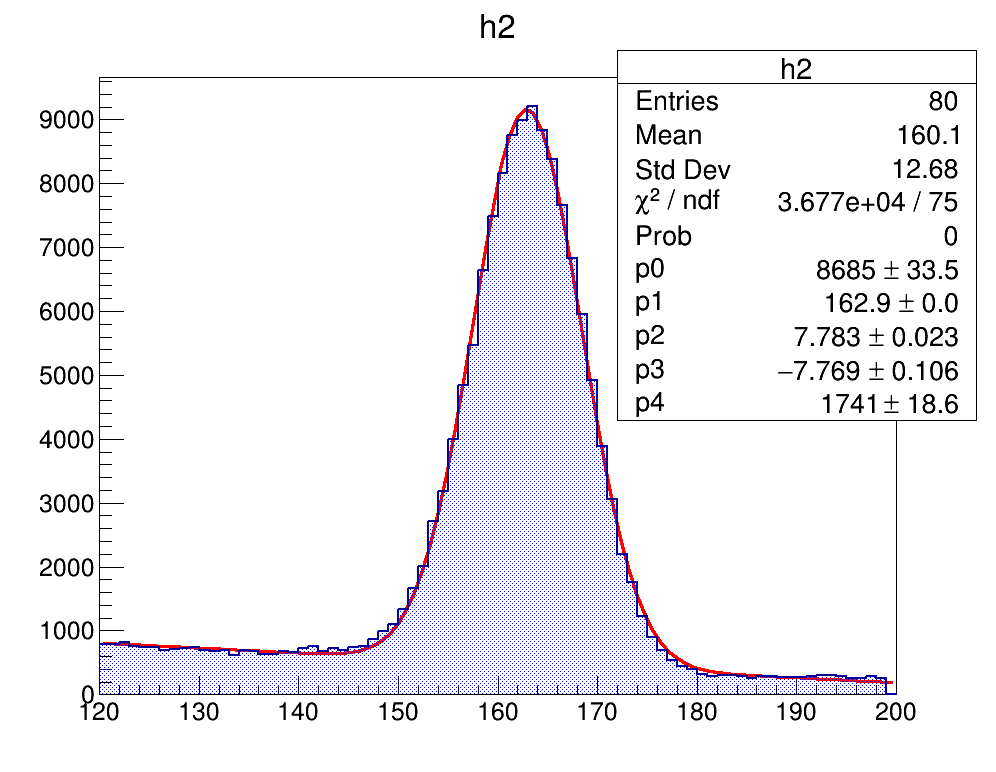

In [12]:
f = open("/Users/boldrinicoder/lab4/data/{}/{}22.txt".format(data,data), "r")
lists = f.readlines()
value = []
for i in lists:
    value.append(i.strip())
value = list(map(int,value))


sup = 200
inf = 120
bins = sup-inf
peak = value.index(max(value))
print(peak)
h2 = r.TH1F("h2", "h2", bins, inf, sup)
h2.SetFillColor(r.kBlue)
h2.SetFillStyle(3003)
h2.SetLineWidth(2)
i = inf
z = 0
fit = r.TF1("fit", "[0]*exp(-((x[0]-[1])^2)/[2]^2)+[3]*x[0]+[4]",inf,sup)
fit.SetParameters(2200,354,18,0,1)
fit.SetLineWidth(3)
while i < sup:
    h2.SetBinContent(z,value[i])
    i += 1 
    z += 1
integral = 0
for i in value[inf:sup]:
    integral += i
print("integral {}".format(integral))
c2 = r.TCanvas("c2", "c2",50,50,1000,800)
h2.Fit("fit", "RL")
h2.Draw("histo same")
r.gStyle.SetOptStat(1111)
r.gStyle.SetOptFit(1111)
c2.Draw() 

In [13]:
fwhm = FWHM(fit)
Res = Resolution(fit)
Err = Res_Error(fit,fwhm)
print("Resolution = {} pm {}".format(Res,Err))
OOS_Resolutions.append(Res)
OOS_Errors.append(Err)

Resolution = 7.952752569988768 pm 0.03340305011798401


# Fourth Sprectrum

216
integral 158621
 FCN=359.292 FROM MIGRAD    STATUS=CONVERGED     407 CALLS         408 TOTAL
                     EDM=3.6081e-09    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   1.3 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           6.65479e+03   2.53349e+01  -2.42423e-03   2.65770e-06
   2  p1           2.13843e+02   2.39282e-02   1.89976e-05   1.51904e-03
   3  p2           1.01589e+01   2.87967e-02   5.13930e-05   2.67547e-03
   4  p3          -4.62352e+00   6.66009e-02  -1.18521e-04   5.80528e-03
   5  p4           1.35251e+03   1.52011e+01   2.57360e-02   2.46541e-05
                               ERR DEF= 0.5


Warning in <TROOT::Append>: Replacing existing TH1: h2 (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2


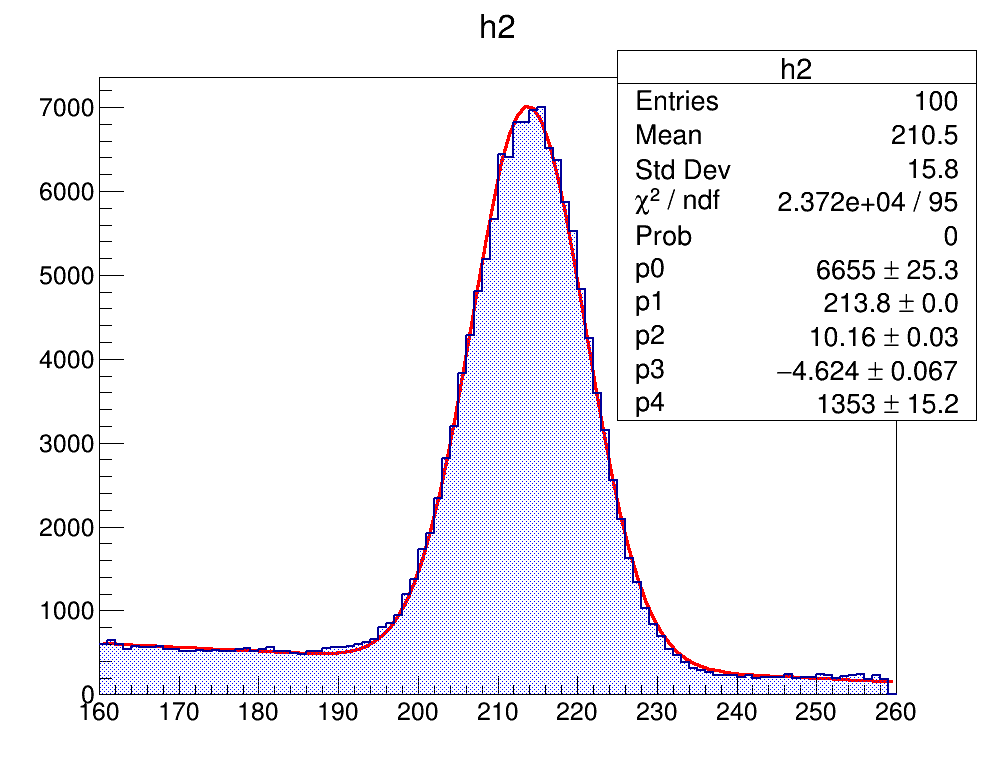

In [14]:
f = open("/Users/boldrinicoder/lab4/data/{}/{}23.txt".format(data,data), "r")
lists = f.readlines()
value = []
for i in lists:
    value.append(i.strip())
value = list(map(int,value))


sup = 260
inf = 160
bins = sup-inf
peak = value.index(max(value))
print(peak)
h2 = r.TH1F("h2", "h2", bins, inf, sup)
h2.SetFillColor(r.kBlue)
h2.SetFillStyle(3003)
h2.SetLineWidth(2)
i = inf
z = 0
fit = r.TF1("fit", "[0]*exp(-((x[0]-[1])^2)/[2]^2)+[3]*x[0]+[4]",inf,sup)
fit.SetParameters(2200,354,18,0,1)
fit.SetLineWidth(3)
while i < sup:
    h2.SetBinContent(z,value[i])
    i += 1 
    z += 1
integral = 0
for i in value[inf:sup]:
    integral += i
print("integral {}".format(integral))
c2 = r.TCanvas("c2", "c2",50,50,1000,800)
h2.Fit("fit", "RL")
h2.Draw("histo same")
r.gStyle.SetOptStat(1111)
r.gStyle.SetOptFit(1111)
c2.Draw()

In [15]:
fwhm = FWHM(fit)
Res = Resolution(fit)
Err = Res_Error(fit,fwhm)
print("Resolution = {} pm {}".format(Res,Err))
OOS_Resolutions.append(Res)
OOS_Errors.append(Err)

Resolution = 7.910389214416254 pm 0.03172550064225743


# Fifth spectrum

262
integral 137389
 FCN=248.165 FROM MIGRAD    STATUS=CONVERGED     312 CALLS         313 TOTAL
                     EDM=3.2984e-07    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   1.9 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           5.14097e+03   2.00356e+01  -2.38348e-01   3.48923e-05
   2  p1           2.61122e+02   3.02338e-02  -2.09392e-04   1.61006e-02
   3  p2           1.23908e+01   3.78218e-02   2.20258e-05   1.38679e-02
   4  p3          -3.36623e+00   7.60089e-02  -3.24885e-04  -9.96677e-03
   5  p4           1.15968e+03   2.17739e+01   1.04984e-01  -4.02253e-05
                               ERR DEF= 0.5


Warning in <TROOT::Append>: Replacing existing TH1: h2 (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2


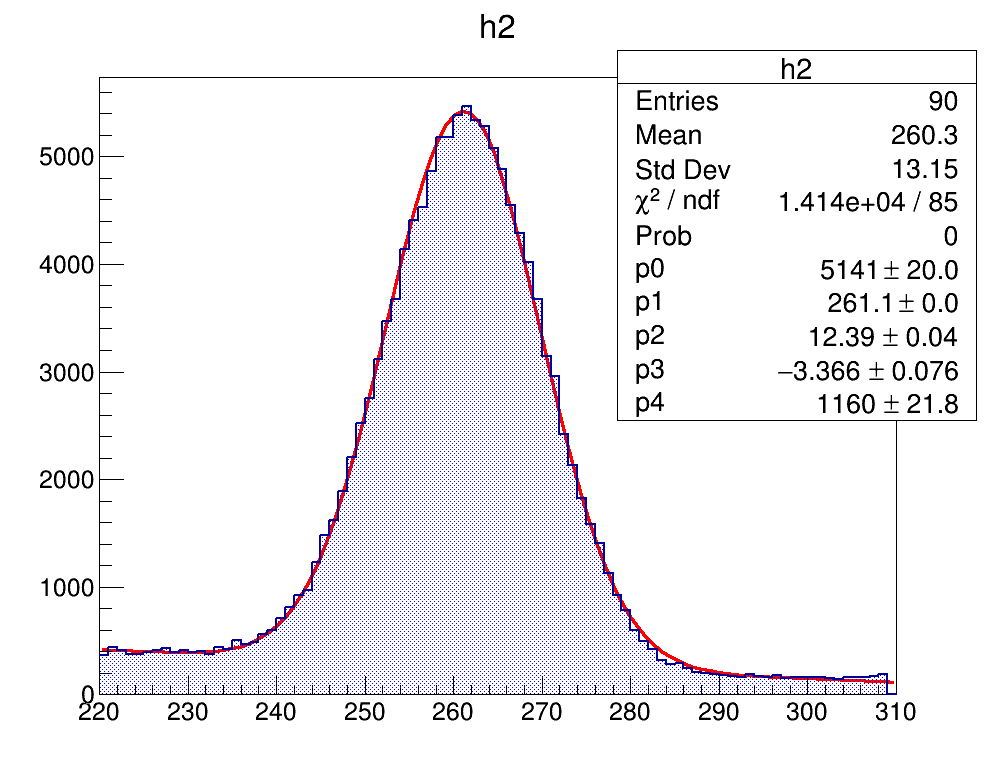

In [16]:
f = open("/Users/boldrinicoder/lab4/data/{}/{}24.txt".format(data,data), "r")
lists = f.readlines()
value = []
for i in lists:
    value.append(i.strip())
value = list(map(int,value))


sup = 310
inf = 220
bins = sup-inf
peak = value.index(max(value))
print(peak)
h2 = r.TH1F("h2", "h2", bins, inf, sup)
h2.SetFillColor(r.kBlue)
h2.SetFillStyle(3003)
h2.SetLineWidth(2)
i = inf
z = 0
fit = r.TF1("fit", "[0]*exp(-((x[0]-[1])^2)/[2]^2)+[3]*x[0]+[4]",inf,sup)
fit.SetParameters(2200,354,18,0,1)
fit.SetLineWidth(3)
while i < sup:
    h2.SetBinContent(z,value[i])
    i += 1 
    z += 1
integral = 0
for i in value[inf:sup]:
    integral += i
print("integral {}".format(integral))
c2 = r.TCanvas("c2", "c2",50,50,1000,800)
h2.Fit("fit", "RL")
h2.Draw("histo same")
r.gStyle.SetOptStat(1111)
r.gStyle.SetOptFit(1111)
c2.Draw()

In [17]:
fwhm = FWHM(fit)
Res = Resolution(fit)
Err = Res_Error(fit,fwhm)
print("Resolution = {} pm {}".format(Res,Err))
OOS_Resolutions.append(Res)
OOS_Errors.append(Err)

Resolution = 7.901355606925539 pm 0.03412285459796492


# Sixth spectrum

307
integral 143807
 FCN=317.143 FROM MIGRAD    STATUS=CONVERGED     503 CALLS         504 TOTAL
                     EDM=1.08708e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           4.37853e+03   1.71495e+01   1.68897e-01   5.45804e-06
   2  p1           3.05427e+02   3.53878e-02   4.29270e-04  -1.38967e-03
   3  p2           1.45358e+01   4.26389e-02   3.93878e-04   1.29699e-03
   4  p3          -2.11394e+00   3.59500e-02   5.74635e-05   1.33453e-02
   5  p4           8.80684e+02   1.19005e+01   1.88255e-02   4.24589e-05
                               ERR DEF= 0.5


Warning in <TROOT::Append>: Replacing existing TH1: h2 (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2


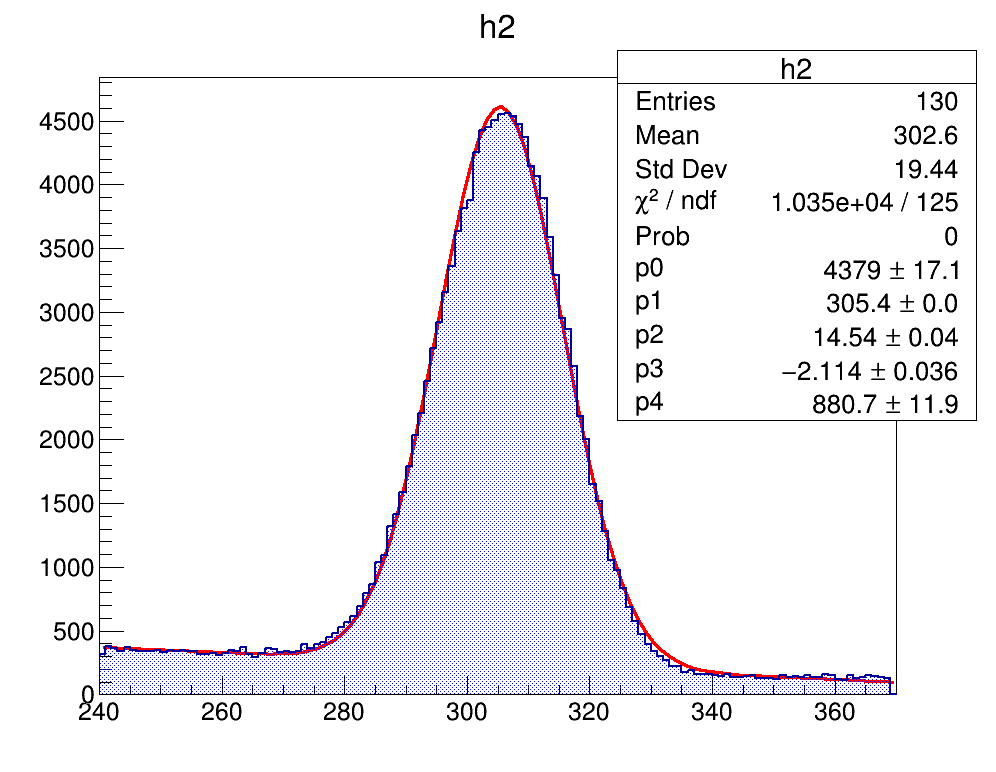

In [18]:
f = open("/Users/boldrinicoder/lab4/data/{}/{}25.txt".format(data,data), "r")
lists = f.readlines()
value = []
for i in lists:
    value.append(i.strip())
value = list(map(int,value))


sup = 370
inf = 240
bins = sup-inf
peak = value.index(max(value))
print(peak)
h2 = r.TH1F("h2", "h2", bins, inf, sup)
h2.SetFillColor(r.kBlue)
h2.SetFillStyle(3003)
h2.SetLineWidth(2)
i = inf
z = 0
fit = r.TF1("fit", "[0]*exp(-((x[0]-[1])^2)/[2]^2)+[3]*x[0]+[4]",inf,sup)
fit.SetParameter(0,2200)
fit.SetParameter(1,830)
fit.SetParameter(2,18)
fit.SetParameter(5,80)
#fit.SetParameters(2200,830,18,10,10,100)
fit.SetLineWidth(3)
while i < sup:
    h2.SetBinContent(z,value[i])
    i += 1 
    z += 1
integral = 0
for i in value[inf:sup]:
    integral += i
print("integral {}".format(integral))
c2 = r.TCanvas("c2", "c2",50,50,1000,800)
h2.Fit("fit", "RL")
h2.Draw("histo same")
r.gStyle.SetOptStat(1111)
r.gStyle.SetOptFit(1111)
c2.Draw()

In [19]:
fwhm = FWHM(fit)
Res = Resolution(fit)
Err = Res_Error(fit,fwhm)
print("Resolution = {} pm {}".format(Res,Err))
OOS_Resolutions.append(Res)
OOS_Errors.append(Err)

Resolution = 7.924567944008404 pm 0.032889543044260075


# 7 spectrum

347
integral 135040
 FCN=196.461 FROM MIGRAD    STATUS=CONVERGED     339 CALLS         340 TOTAL
                     EDM=8.26923e-10    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   1.8 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           3.90901e+03   1.51954e+01   6.67465e-03  -1.37494e-06
   2  p1           3.48740e+02   4.19742e-02  -3.95127e-06  -1.25772e-04
   3  p2           1.64562e+01   5.30068e-02  -1.51996e-05  -2.59541e-04
   4  p3          -2.30620e+00   5.93425e-02   5.51064e-06   5.53051e-04
   5  p4           1.01456e+03   2.22233e+01   2.55925e-03  -1.61877e-07
                               ERR DEF= 0.5


Warning in <TROOT::Append>: Replacing existing TH1: h2 (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2


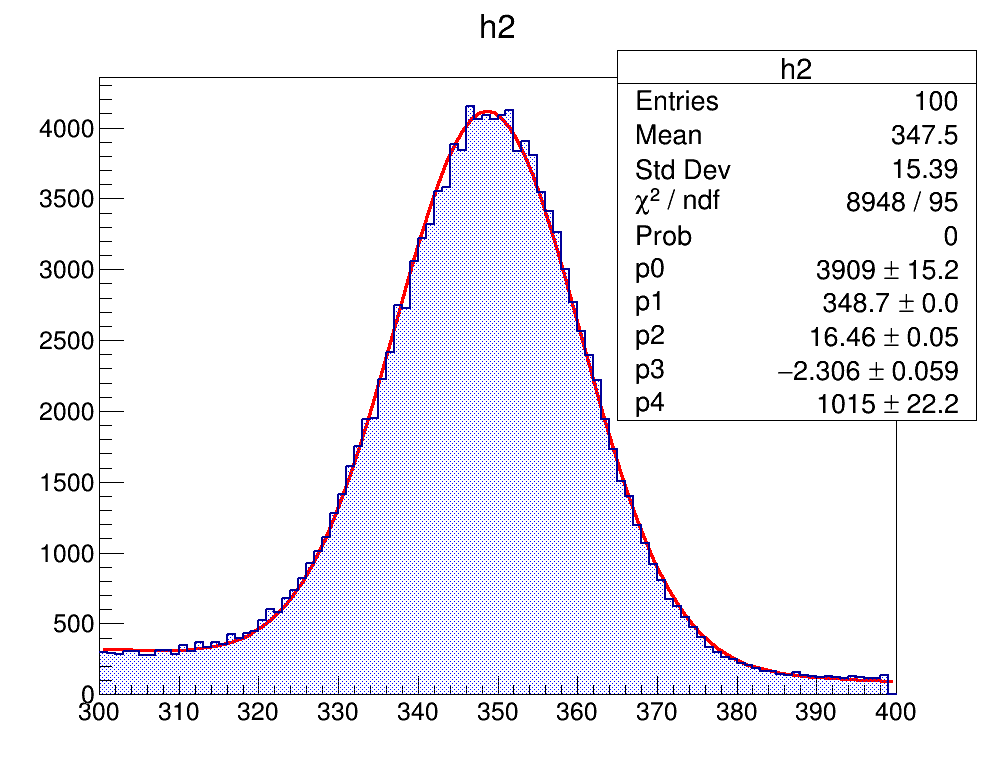

In [20]:
f = open("/Users/boldrinicoder/lab4/data/{}/{}26.txt".format(data,data), "r")
lists = f.readlines()
value = []
for i in lists:
    value.append(i.strip())
value = list(map(int,value))


sup = 400
inf = 300
bins = sup-inf
peak = value.index(max(value))
print(peak)
h2 = r.TH1F("h2", "h2", bins, inf, sup)
h2.SetFillColor(r.kBlue)
h2.SetFillStyle(3003)
h2.SetLineWidth(2)
i = inf
z = 0
fit = r.TF1("fit", "[0]*exp(-((x[0]-[1])^2)/[2]^2)+[3]*x[0]+[4]",inf,sup)
fit.SetParameter(0,2200)
fit.SetParameter(1,830)
fit.SetParameter(2,18)
fit.SetParameter(5,80)
#fit.SetParameters(2200,830,18,10,10,100)
fit.SetLineWidth(3)
while i < sup:
    h2.SetBinContent(z,value[i])
    i += 1 
    z += 1
integral = 0
for i in value[inf:sup]:
    integral += i
print("integral {}".format(integral))
c2 = r.TCanvas("c2", "c2",50,50,1000,800)
h2.Fit("fit", "RL")
h2.Draw("histo same")
r.gStyle.SetOptStat(1111)
r.gStyle.SetOptFit(1111)
c2.Draw()

In [21]:
fwhm = FWHM(fit)
Res = Resolution(fit)
Err = Res_Error(fit,fwhm)
print("Resolution = {} pm {}".format(Res,Err))
OOS_Resolutions.append(Res)
OOS_Errors.append(Err)

Resolution = 7.857263642828092 pm 0.03580737594177985


# 8 spectrum

392
integral 161086
 FCN=351.65 FROM MIGRAD    STATUS=CONVERGED     434 CALLS         435 TOTAL
                     EDM=7.04218e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           3.58376e+03   1.37419e+01   1.42622e-01  -4.17242e-07
   2  p1           3.92206e+02   4.39317e-02   5.64798e-04  -4.37011e-04
   3  p2           1.85279e+01   5.20047e-02   5.17737e-04   1.86037e-04
   4  p3          -1.22853e+00   1.54271e-02   3.22631e-05  -2.61084e-02
   5  p4           6.77826e+02   6.56177e+00   1.36195e-02  -5.40572e-05
                               ERR DEF= 0.5


Warning in <TROOT::Append>: Replacing existing TH1: h2 (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2


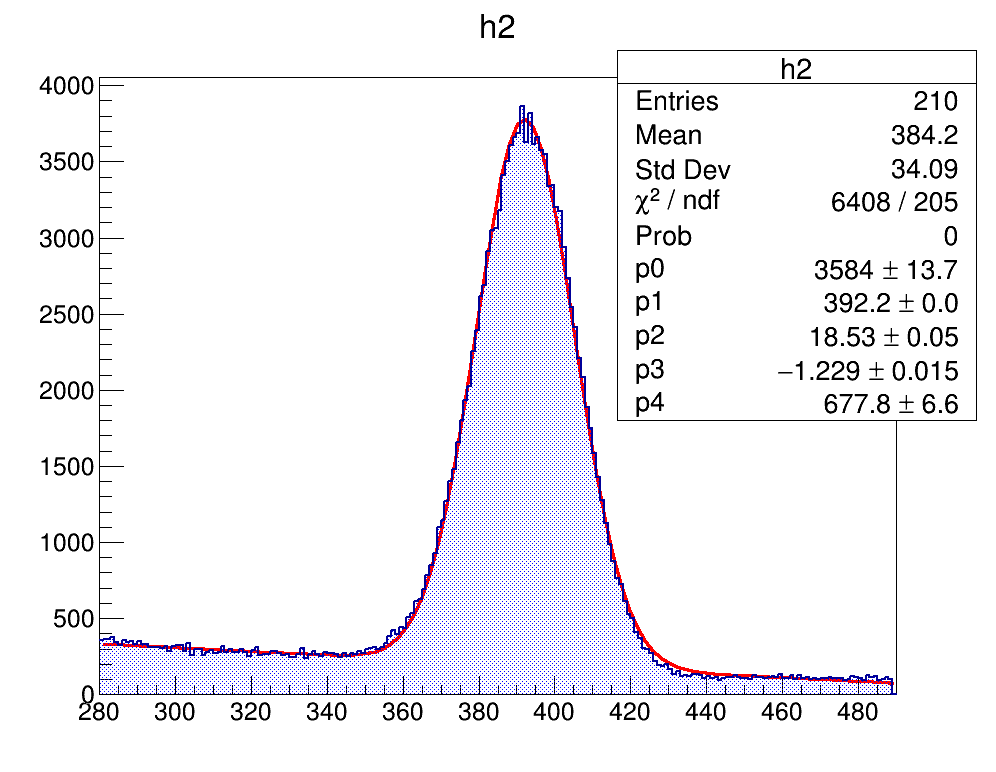

In [22]:
f = open("/Users/boldrinicoder/lab4/data/{}/{}27.txt".format(data,data), "r")
lists = f.readlines()
value = []
for i in lists:
    value.append(i.strip())
value = list(map(int,value))


sup = 490
inf = 280
bins = sup-inf
peak = value.index(max(value))
print(peak)
h2 = r.TH1F("h2", "h2", bins, inf, sup)
h2.SetFillColor(r.kBlue)
h2.SetFillStyle(3003)
h2.SetLineWidth(2)
i = inf
z = 0
fit = r.TF1("fit", "[0]*exp(-((x[0]-[1])^2)/[2]^2)+[3]*x[0]+[4]",inf,sup)
fit.SetParameters(2200,400,10,10,100)
fit.SetLineWidth(3)
while i < sup:
    h2.SetBinContent(z,value[i])
    i += 1 
    z += 1
integral = 0
for i in value[inf:sup]:
    integral += i
print("integral {}".format(integral))
c2 = r.TCanvas("c2", "c2",50,50,1000,800)
h2.Fit("fit", "RL")
h2.Draw("histo same")
r.gStyle.SetOptStat(1111)
r.gStyle.SetOptFit(1111)
c2.Draw()

In [23]:
fwhm = FWHM(fit)
Res = Resolution(fit)
Err = Res_Error(fit,fwhm)
print("Resolution = {} pm {}".format(Res,Err))
OOS_Resolutions.append(Res)
OOS_Errors.append(Err)

Resolution = 7.866026145009322 pm 0.03123865532943668


# 9 spectrum

501
integral 143939
 FCN=265.881 FROM MIGRAD    STATUS=CONVERGED     404 CALLS         405 TOTAL
                     EDM=2.80918e-09    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   2.6 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           2.81414e+03   1.08213e+01  -1.31602e-02  -3.61644e-06
   2  p1           4.99827e+02   5.67143e-02  -4.17886e-05  -4.90842e-04
   3  p2           2.34607e+01   7.05718e-02   4.05817e-05   2.46668e-04
   4  p3          -8.53286e-01   1.97442e-02  -3.92317e-05   2.02121e-02
   5  p4           5.83624e+02   1.09097e+01   2.30446e-02   3.73897e-05
                               ERR DEF= 0.5


Warning in <TROOT::Append>: Replacing existing TH1: h2 (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2


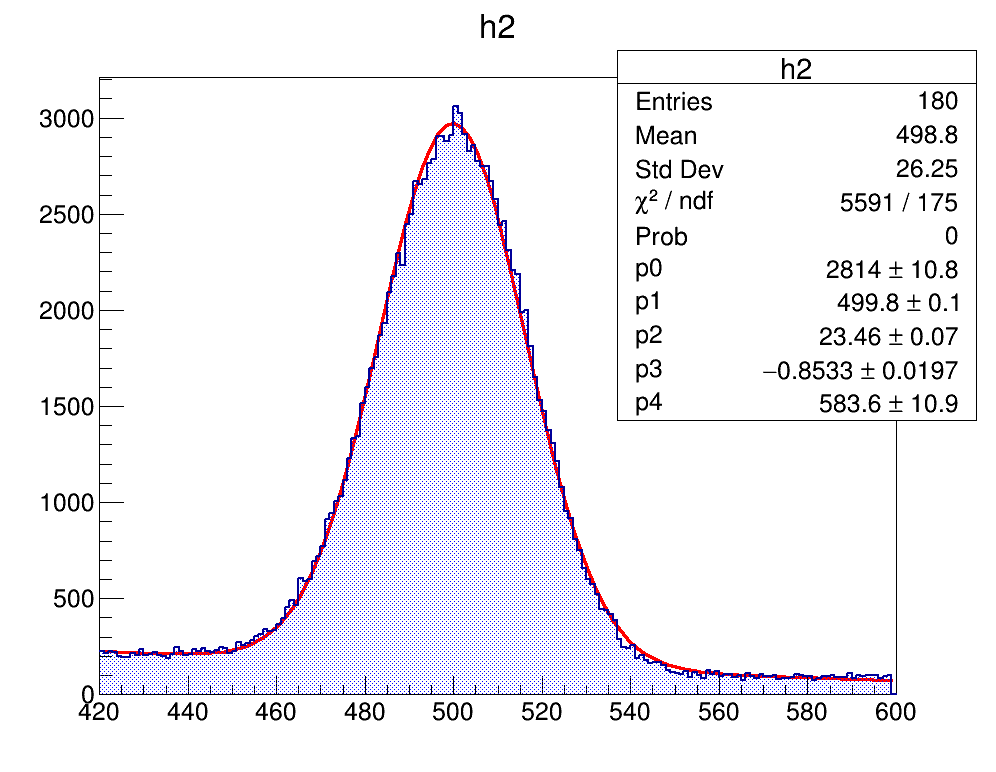

In [24]:
f = open("/Users/boldrinicoder/lab4/data/{}/{}28.txt".format(data,data), "r")
lists = f.readlines()
value = []
for i in lists:
    value.append(i.strip())
value = list(map(int,value))


sup = 600
inf = 420
bins = sup-inf
peak = value.index(max(value))
print(peak)
h2 = r.TH1F("h2", "h2", bins, inf, sup)
h2.SetFillColor(r.kBlue)
h2.SetFillStyle(3003)
h2.SetLineWidth(2)
i = inf
z = 0
fit = r.TF1("fit", "[0]*exp(-((x[0]-[1])^2)/[2]^2)+[3]*x[0]+[4]",inf,sup)
fit.SetParameters(2200,500,10,10,100)
fit.SetLineWidth(3)
while i < sup:
    h2.SetBinContent(z,value[i])
    i += 1 
    z += 1
integral = 0
for i in value[inf:sup]:
    integral += i
print("integral {}".format(integral))
c2 = r.TCanvas("c2", "c2",50,50,1000,800)
h2.Fit("fit", "RL")
h2.Draw("histo same")
r.gStyle.SetOptStat(1111)
r.gStyle.SetOptFit(1111)
c2.Draw()

In [25]:
fwhm = FWHM(fit)
Res = Resolution(fit)
Err = Res_Error(fit,fwhm)
print("Resolution = {} pm {}".format(Res,Err))
OOS_Resolutions.append(Res)
OOS_Errors.append(Err)

Resolution = 7.815665145049502 pm 0.033262640224002105


# 10 spectrum

562
integral 144488
 FCN=335.203 FROM MIGRAD    STATUS=CONVERGED     415 CALLS         416 TOTAL
                     EDM=2.76027e-09    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   2.4 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           2.41857e+03   9.41929e+00  -5.24529e-03  -1.95963e-06
   2  p1           5.60572e+02   6.41441e-02  -1.62935e-05   1.29446e-04
   3  p2           2.64325e+01   7.76744e-02   5.55244e-05  -6.80836e-04
   4  p3          -5.42462e-01   1.01294e-02  -5.75692e-07  -4.65797e-02
   5  p4           4.35927e+02   6.37142e+00   1.22405e-03  -8.03284e-05
                               ERR DEF= 0.5


Warning in <TROOT::Append>: Replacing existing TH1: h2 (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2


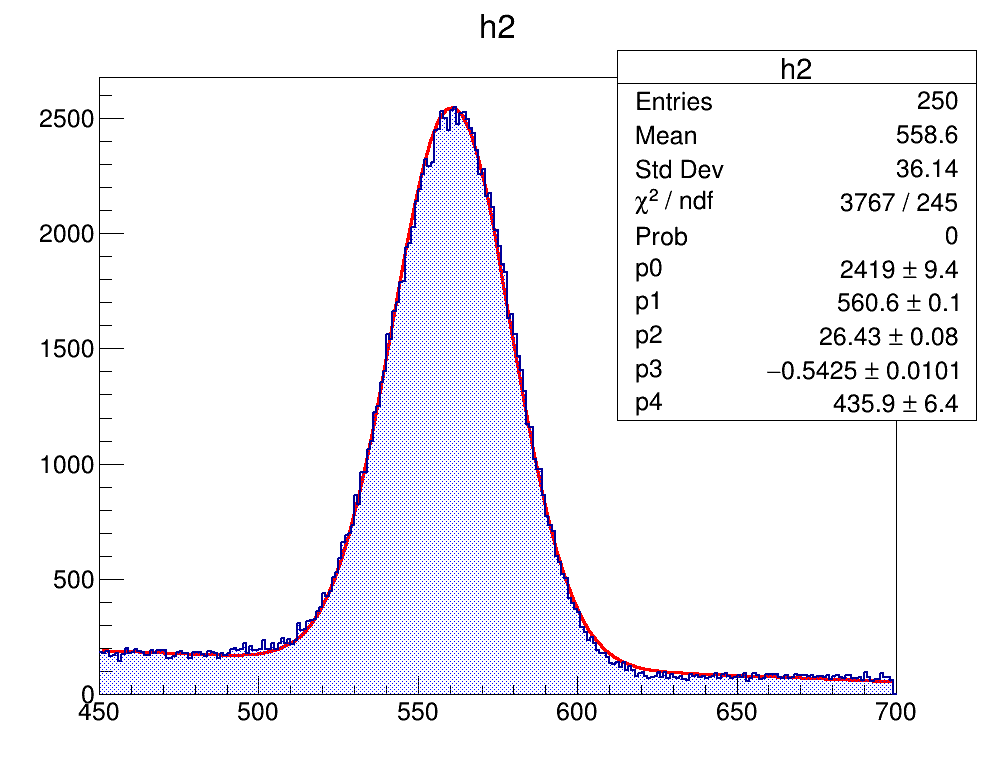

In [26]:
f = open("/Users/boldrinicoder/lab4/data/{}/{}29.txt".format(data,data), "r")
lists = f.readlines()
value = []
for i in lists:
    value.append(i.strip())
value = list(map(int,value))


sup = 700
inf = 450
bins = sup-inf
peak = value.index(max(value))
print(peak)
h2 = r.TH1F("h2", "h2", bins, inf, sup)
h2.SetFillColor(r.kBlue)
h2.SetFillStyle(3003)
h2.SetLineWidth(2)
i = inf
z = 0
fit = r.TF1("fit", "[0]*exp(-((x[0]-[1])^2)/[2]^2)+[3]*x[0]+[4]",inf,sup)
fit.SetParameters(2200,500,10,10,100)
fit.SetLineWidth(3)
while i < sup:
    h2.SetBinContent(z,value[i])
    i += 1 
    z += 1
integral = 0
for i in value[inf:sup]:
    integral += i
print("integral {}".format(integral))
c2 = r.TCanvas("c2", "c2",50,50,1000,800)
h2.Fit("fit", "RL")
h2.Draw("histo same")
r.gStyle.SetOptStat(1111)
r.gStyle.SetOptFit(1111)
c2.Draw()

In [27]:
fwhm = FWHM(fit)
Res = Resolution(fit)
Err = Res_Error(fit,fwhm)
print("Resolution = {} pm {}".format(Res,Err))
OOS_Resolutions.append(Res)
OOS_Errors.append(Err)

Resolution = 7.851481312086183 pm 0.03264391698505108


# 11 spectrum

609
integral 140726
 FCN=327.245 FROM MIGRAD    STATUS=CONVERGED     442 CALLS         443 TOTAL
                     EDM=2.8715e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           2.18838e+03   8.66242e+00   8.66200e-02   9.35814e-07
   2  p1           6.09243e+02   7.09053e-02   8.71574e-04   1.93867e-04
   3  p2           2.86729e+01   8.71161e-02   8.02830e-04  -3.21730e-04
   4  p3          -5.31839e-01   1.01474e-02   1.42919e-05   2.43501e-02
   5  p4           4.49729e+02   6.93015e+00   9.62606e-03   3.63831e-05
                               ERR DEF= 0.5


Warning in <TROOT::Append>: Replacing existing TH1: h2 (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2


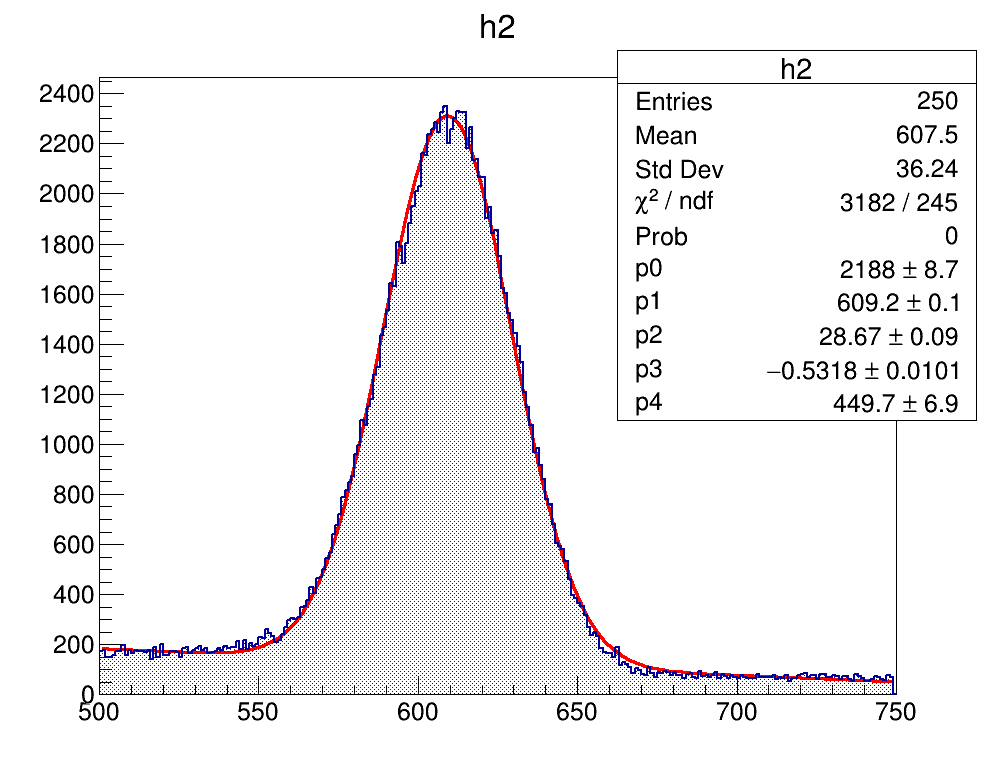

In [28]:
data = str(181130)



f = open("/Users/boldrinicoder/lab4/data/{}/{}01.txt".format(data,data), "r")
lists = f.readlines()
value = []
for i in lists:
    value.append(i.strip())
value = list(map(int,value))


sup = 750
inf = 500
bins = sup-inf
peak = value.index(max(value))
print(peak)
h2 = r.TH1F("h2", "h2", bins, inf, sup)
h2.SetFillColor(r.kBlue)
h2.SetFillStyle(3003)
h2.SetLineWidth(2)
i = inf
z = 0
fit = r.TF1("fit", "[0]*exp(-((x[0]-[1])^2)/[2]^2)+[3]*x[0]+[4]",inf,sup)
fit.SetParameters(2200,650,10,10,100)
fit.SetLineWidth(3)
while i < sup:
    h2.SetBinContent(z,value[i])
    i += 1 
    z += 1
integral = 0
for i in value[inf:sup]:
    integral += i
print("integral {}".format(integral))
c2 = r.TCanvas("c2", "c2",50,50,1000,800)
h2.Fit("fit", "RL")
h2.Draw("histo same")
r.gStyle.SetOptStat(1111)
r.gStyle.SetOptFit(1111)
c2.Draw()

In [29]:
fwhm = FWHM(fit)
Res = Resolution(fit)
Err = Res_Error(fit,fwhm)
print("Resolution = {} pm {}".format(Res,Err))
OOS_Resolutions.append(Res)
OOS_Errors.append(Err)

Resolution = 7.836547770313561 pm 0.03368668697085428


# 12 spectrum

669
integral 131511
 FCN=272.902 FROM MIGRAD    STATUS=CONVERGED     387 CALLS         388 TOTAL
                     EDM=1.51621e-08    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   2.3 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.90785e+03   7.69678e+00  -3.31753e-03  -1.25035e-05
   2  p1           6.65578e+02   7.87097e-02  -5.17859e-05   1.20747e-03
   3  p2           3.12265e+01   9.70608e-02  -1.13228e-04  -7.31463e-04
   4  p3          -4.57199e-01   9.40506e-03  -1.19526e-05  -8.45328e-02
   5  p4           4.11598e+02   6.85640e+00   7.93371e-03  -1.34715e-04
                               ERR DEF= 0.5


Warning in <TROOT::Append>: Replacing existing TH1: h2 (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2


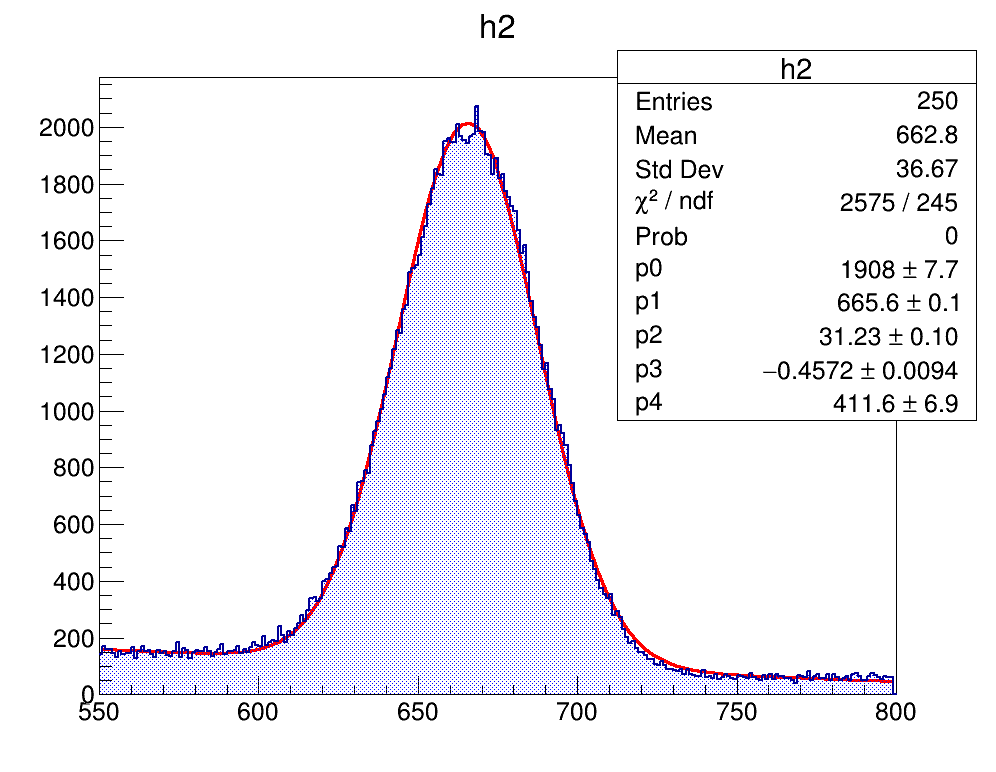

In [30]:
f = open("/Users/boldrinicoder/lab4/data/{}/{}02.txt".format(data,data), "r")
lists = f.readlines()
value = []
for i in lists:
    value.append(i.strip())
value = list(map(int,value))


sup = 800
inf = 550
bins = sup-inf
peak = value.index(max(value))
print(peak)
h2 = r.TH1F("h2", "h2", bins, inf, sup)
h2.SetFillColor(r.kBlue)
h2.SetFillStyle(3003)
h2.SetLineWidth(2)
i = inf
z = 0
fit = r.TF1("fit", "[0]*exp(-((x[0]-[1])^2)/[2]^2)+[3]*x[0]+[4]",inf,sup)
fit.SetParameters(2200,670,10,10,100)
fit.SetLineWidth(3)
while i < sup:
    h2.SetBinContent(z,value[i])
    i += 1 
    z += 1
integral = 0
for i in value[inf:sup]:
    integral += i
print("integral {}".format(integral))
c2 = r.TCanvas("c2", "c2",50,50,1000,800)
h2.Fit("fit", "RL")
h2.Draw("histo same")
r.gStyle.SetOptStat(1111)
r.gStyle.SetOptFit(1111)
c2.Draw()

In [31]:
fwhm = FWHM(fit)
Res = Resolution(fit)
Err = Res_Error(fit,fwhm)
print("Resolution = {} pm {}".format(Res,Err))
OOS_Resolutions.append(Res)
OOS_Errors.append(Err)

Resolution = 7.812129329266859 pm 0.03435525670611092


# 13 spectrum

720
integral 130683
 FCN=286.513 FROM MIGRAD    STATUS=CONVERGED     396 CALLS         397 TOTAL
                     EDM=7.26572e-10    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   3.1 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.74254e+03   7.10717e+00   2.29339e-02  -3.73768e-06
   2  p1           7.21380e+02   8.64513e-02  -2.37728e-05   2.05094e-04
   3  p2           3.37385e+01   1.06657e-01  -9.52394e-05  -8.02880e-05
   4  p3          -3.85078e-01   7.95075e-03   2.33124e-05   1.63555e-02
   5  p4           3.79132e+02   6.41988e+00  -1.80675e-02   1.68091e-05
                               ERR DEF= 0.5


Warning in <TROOT::Append>: Replacing existing TH1: h2 (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2


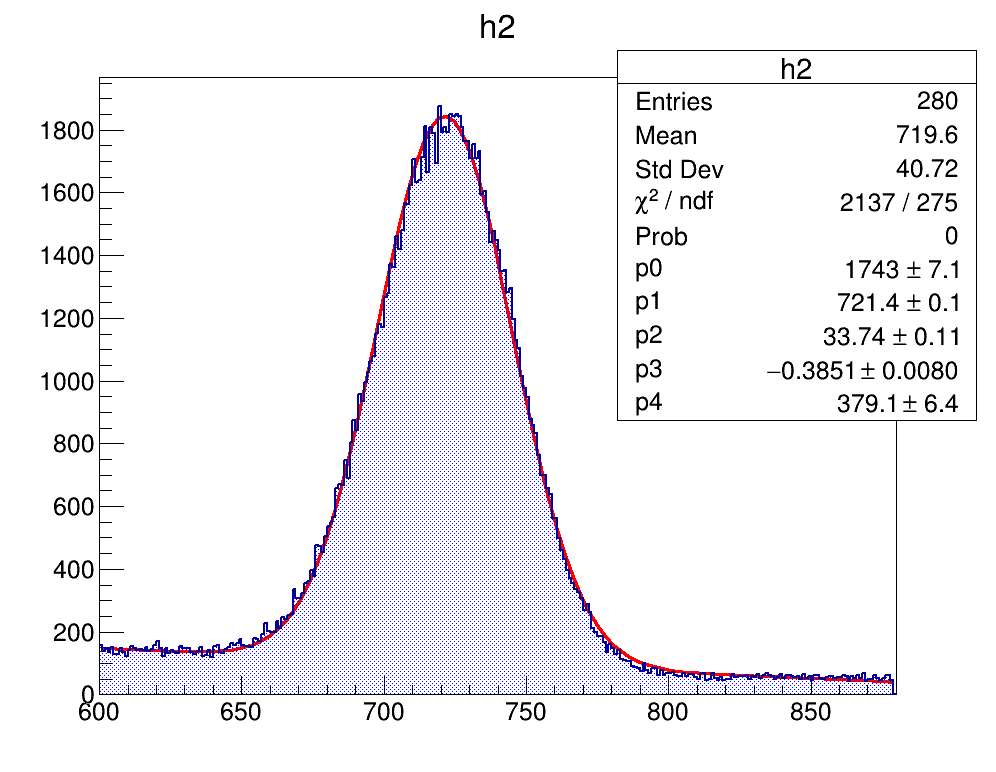

In [32]:
f = open("/Users/boldrinicoder/lab4/data/{}/{}03.txt".format(data,data), "r")
lists = f.readlines()
value = []
for i in lists:
    value.append(i.strip())
value = list(map(int,value))


sup = 880
inf = 600
bins = sup-inf
peak = value.index(max(value))
print(peak)
h2 = r.TH1F("h2", "h2", bins, inf, sup)
h2.SetFillColor(r.kBlue)
h2.SetFillStyle(3003)
h2.SetLineWidth(2)
i = inf
z = 0
fit = r.TF1("fit", "[0]*exp(-((x[0]-[1])^2)/[2]^2)+[3]*x[0]+[4]",inf,sup)
fit.SetParameters(2200,710,10,10,100)
fit.SetLineWidth(3)
while i < sup:
    h2.SetBinContent(z,value[i])
    i += 1 
    z += 1
integral = 0
for i in value[inf:sup]:
    integral += i
print("integral {}".format(integral))
c2 = r.TCanvas("c2", "c2",50,50,1000,800)
h2.Fit("fit", "RL")
h2.Draw("histo same")
r.gStyle.SetOptStat(1111)
r.gStyle.SetOptFit(1111)
c2.Draw()

In [33]:
fwhm = FWHM(fit)
Res = Resolution(fit)
Err = Res_Error(fit,fwhm)
print("Resolution = {} pm {}".format(Res,Err))
OOS_Resolutions.append(Res)
OOS_Errors.append(Err)

Resolution = 7.787632177443529 pm 0.034831384960199975


# 14 spectrum

782
integral 129534
 FCN=270.822 FROM MIGRAD    STATUS=CONVERGED     513 CALLS         514 TOTAL
                     EDM=9.27747e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.61354e+03   6.57491e+00   5.98511e-02   1.77277e-05
   2  p1           7.78500e+02   9.42034e-02   1.04492e-03   1.64925e-03
   3  p2           3.66778e+01   1.16692e-01   9.61785e-04   2.64565e-03
   4  p3          -3.63046e-01   7.99214e-03   9.56215e-06   5.19693e-02
   5  p4           3.75870e+02   6.75841e+00   7.97032e-03   4.77199e-05
                               ERR DEF= 0.5


Warning in <TROOT::Append>: Replacing existing TH1: h2 (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2


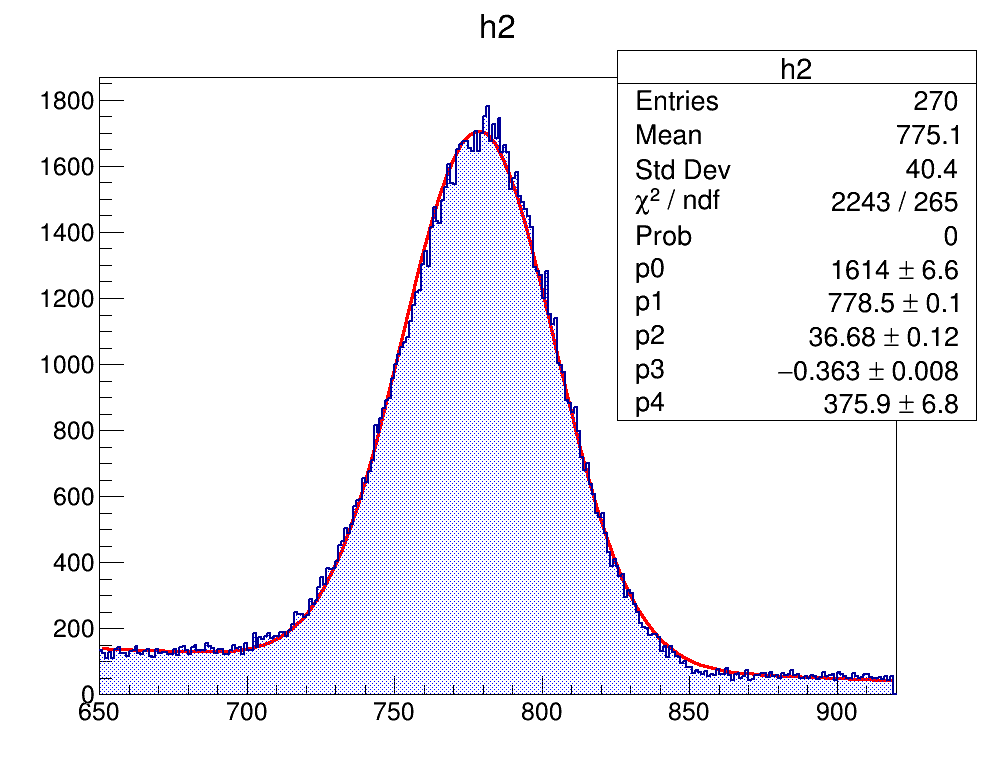

In [34]:
f = open("/Users/boldrinicoder/lab4/data/{}/{}04.txt".format(data,data), "r")
lists = f.readlines()
value = []
for i in lists:
    value.append(i.strip())
value = list(map(int,value))


sup = 920
inf = 650
bins = sup-inf
peak = value.index(max(value))
print(peak)
h2 = r.TH1F("h2", "h2", bins, inf, sup)
h2.SetFillColor(r.kBlue)
h2.SetFillStyle(3003)
h2.SetLineWidth(2)
i = inf
z = 0
fit = r.TF1("fit", "[0]*exp(-((x[0]-[1])^2)/[2]^2)+[3]*x[0]+[4]",inf,sup)
fit.SetParameters(2200,770,10,10,100)
fit.SetLineWidth(3)
while i < sup:
    h2.SetBinContent(z,value[i])
    i += 1 
    z += 1
integral = 0
for i in value[inf:sup]:
    integral += i
print("integral {}".format(integral))
c2 = r.TCanvas("c2", "c2",50,50,1000,800)
h2.Fit("fit", "RL")
h2.Draw("histo same")
r.gStyle.SetOptStat(1111)
r.gStyle.SetOptFit(1111)
c2.Draw()

In [35]:
fwhm = FWHM(fit)
Res = Resolution(fit)
Err = Res_Error(fit,fwhm)
print("Resolution = {} pm {}".format(Res,Err))
OOS_Resolutions.append(Res)
OOS_Errors.append(Err)

Resolution = 7.8449026956387495 pm 0.03531275267479198


12
array('f', [7.952752590179443, 7.910389423370361, 7.901355743408203, 7.924568176269531, 7.857263565063477, 7.866025924682617, 7.815665245056152, 7.8514814376831055, 7.8365478515625, 7.812129497528076, 7.787631988525391, 7.844902515411377])
array('f', [0.033403050154447556, 0.03172549977898598, 0.034122854471206665, 0.03288954123854637, 0.035807374864816666, 0.031238654628396034, 0.03326264023780823, 0.032643917948007584, 0.03368668630719185, 0.03435525670647621, 0.03483138605952263, 0.035312753170728683])


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2
Info in <TCanvas::Print>: pdf file /Users/boldrinicoder/Desktop/GainConsistency0.pdf has been created


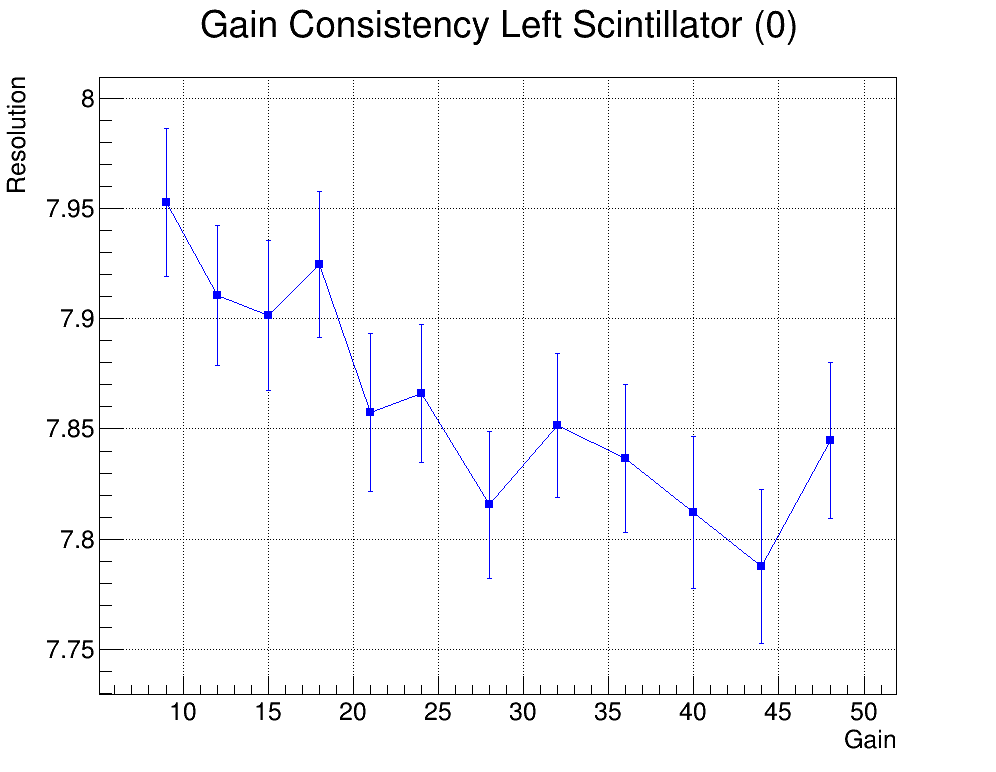

In [45]:
from array import array
print(len(OOS_Resolutions))
Gain= [9,12,15,18,21,24,28,32,36,40,44,48]
err_gain = array('f', np.zeros(len(Gain)))
print(OOS_Resolutions)
print(OOS_Errors)
OOS_Resolutions = array('f', OOS_Resolutions)
OOS_Errors = array('f', OOS_Errors)
Gain = array('f', Gain)
g = r.TGraphErrors(len(Gain), Gain, OOS_Resolutions, err_gain, OOS_Errors)
g.SetTitle("Gain Consistency Left Scintillator (0)")
g.GetXaxis().SetTitle("Gain")
g.GetYaxis().SetTitle("Resolution")
g.SetMarkerStyle(21)
g.SetMarkerColor(4)
g.SetLineColor(4)
c2 = r.TCanvas("c2", "c2", 50,50, 1000,800)
c2.SetGridx()
c2.SetGridy()
g.Draw("APL")
c2.Draw()
c2.SaveAs("/Users/boldrinicoder/Desktop/GainConsistency0.pdf", "pdf")

[7.952753132304707, 7.910389214413931, 7.901355606928132, 7.924567944004058, 7.857263642821662, 7.866026145009265, 7.8156651450482455, 7.851481312086195, 7.836547770312591, 7.812129329268235, 7.787632177444091, 7.844902695639555]
[0.031986804002495664, 0.031725535102547615, 0.034122855529400406, 0.03288955239490434, 0.03580738323600622, 0.031238652428604616, 0.03326265318890095, 0.03264392781252991, 0.03368663041478023, 0.03435525113621333, 0.03483138661858479, 0.03531277523458555]


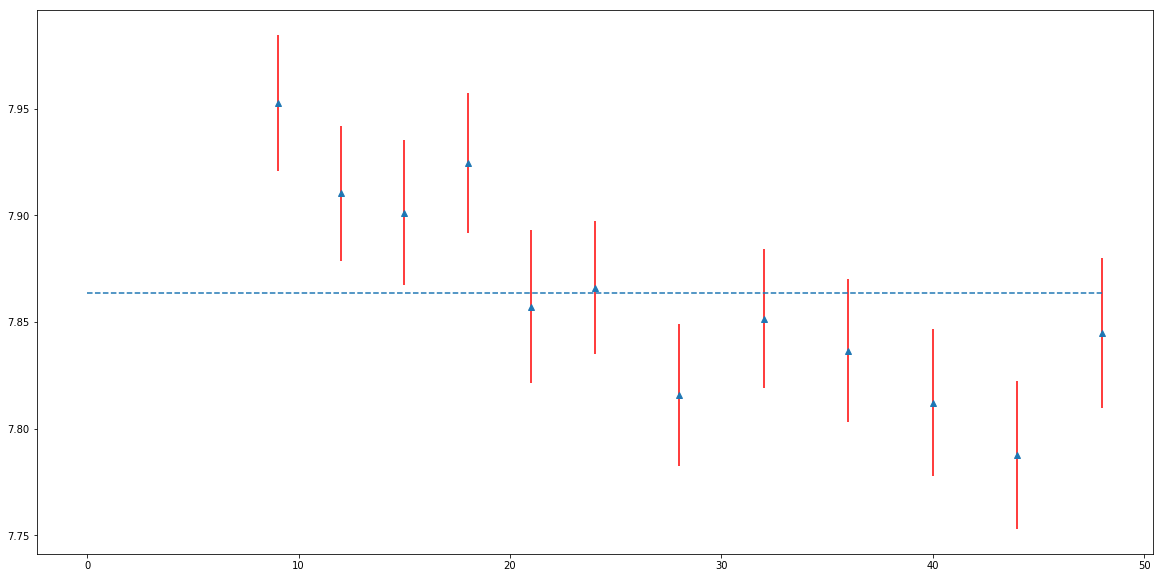

In [209]:
#Gain = [5,6,9,12,15,18,21,24,28,32]
Gain= [9,12,15,18,21,24,28,32,36,40,44,48]
print(OOS_Resolutions)
print(OOS_Errors)
median = np.mean(OOS_Resolutions)
maximum = max(Gain)
fig = plt.figure(figsize=(20,10))
plt.errorbar(Gain, OOS_Resolutions, yerr=OOS_Errors, fmt='^', ecolor='red')
plt.plot([0,maximum], [median, median], '--')
plt.show()

[7.952753132304707, 7.910389214413931, 7.901355606928132, 7.924567944004058, 7.857263642821662, 7.866026145009265, 7.8156651450482455, 7.851481312086195, 7.836547770312591, 7.812129329268235, 7.787632177444091, 7.844902695639555]
[0.031986804002495664, 0.031725535102547615, 0.034122855529400406, 0.03288955239490434, 0.03580738323600622, 0.031238652428604616, 0.03326265318890095, 0.03264392781252991, 0.03368663041478023, 0.03435525113621333, 0.03483138661858479, 0.03531277523458555]


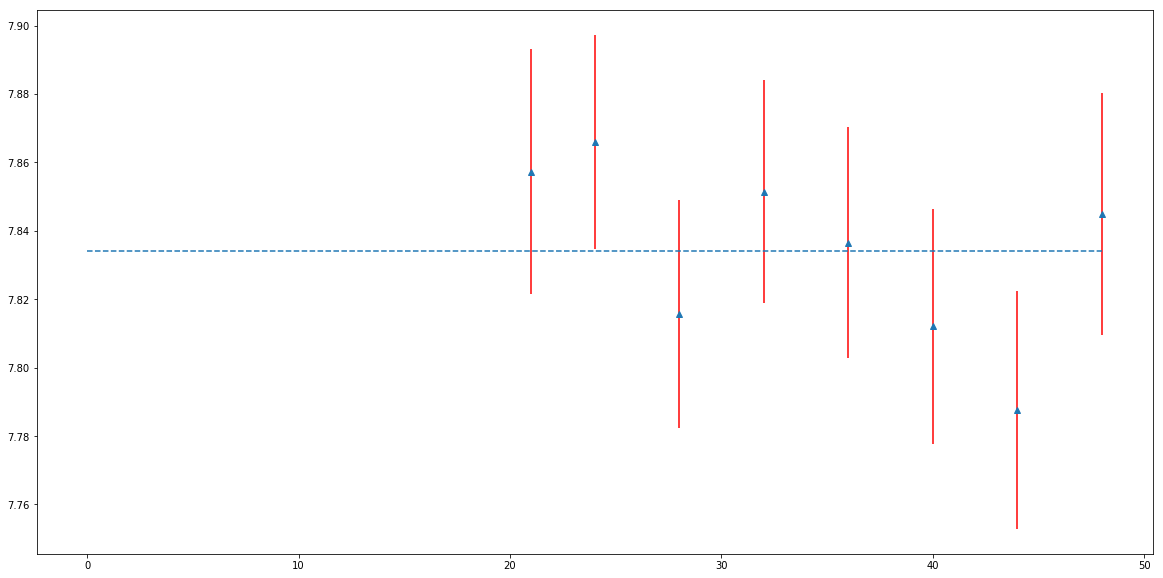

In [210]:
#Gain = [5,6,9,12,15,18,21,24,28,32]
Gain= [9,12,15,18,21,24,28,32,36,40,44,48]
Gain = Gain[4:]
print(OOS_Resolutions)
print(OOS_Errors)
median = np.mean(OOS_Resolutions[4:])
maximum = max(Gain[4:])
fig = plt.figure(figsize=(20,10))
plt.errorbar(Gain, OOS_Resolutions[4:], yerr=OOS_Errors[4:], fmt='^', ecolor='red')
plt.plot([0,maximum], [median, median], '--')
plt.show()

In [ ]:
f = open("/Users/boldrinicoder/lab4/data/{}/{}25.txt".format(data,data), "r")
lists = f.readlines()
value = []
for i in lists:
    value.append(i.strip())
value = list(map(int,value))


sup = 970
inf = 700
bins = sup-inf
peak = value.index(max(value))
print(peak)
h2 = r.TH1F("h2", "h2", bins, inf, sup)
h2.SetFillColor(r.kBlue)
h2.SetFillStyle(3003)
h2.SetLineWidth(2)
i = inf
z = 0
fit = r.TF1("fit", "[0]*exp(-((x[0]-[1])^2)/(2*[2]^2))+ [3]*exp(-[4]*x[0])+ [5]",inf,sup)
fit.SetParameter(0,2200)
fit.SetParameter(1,830)
fit.SetParameter(2,18)
fit.SetParameter(5,80)
#fit.SetParameters(2200,830,18,10,10,100)
fit.SetLineWidth(3)
while i < sup:
    h2.SetBinContent(z,value[i])
    i += 1 
    z += 1
integral = 0
for i in value[inf:sup]:
    integral += i
print("integral {}".format(integral))
c2 = r.TCanvas("c2", "c2",50,50,1000,800)
h2.Fit("fit", "RL")
h2.Draw("histo same")
r.gStyle.SetOptStat(1111)
r.gStyle.SetOptFit(1111)
c2.Draw()

In [ ]:
fwhm = FWHM(fit)
Res = Resolution(fit)
Err = Res_Error(fit,fwhm)
print("Resolution = {} pm {}".format(Res,Err))
OOS_Resolutions.append(Res)
OOS_Errors.append(Err)

In [ ]:
f = open("/home/giacomo/lab/data/{}/{}25.txt".format(data,data), "r")
lists = f.readlines()
value = []
for i in lists:
    value.append(i.strip())
value = list(map(int,value))


sup = 970
inf = 700
bins = sup-inf
peak = value.index(max(value))
print(peak)
h2 = r.TH1F("h2", "h2", bins, inf, sup)
h2.SetFillColor(r.kBlue)
h2.SetFillStyle(3003)
h2.SetLineWidth(2)
i = inf
z = 0
fit = r.TF1("fit", "[0]*exp(-((x[0]-[1])^2)/(2*[2]^2))+ [3]*exp(-[4]*x[0])+ [5]",inf,sup)
fit.SetParameter(0,2200)
fit.SetParameter(1,830)
fit.SetParameter(2,18)
fit.SetParameter(5,80)
#fit.SetParameters(2200,830,18,10,10,100)
fit.SetLineWidth(3)
while i < sup:
    h2.SetBinContent(z,value[i])
    i += 1 
    z += 1
integral = 0
for i in value[inf:sup]:
    integral += i
print("integral {}".format(integral))
c2 = r.TCanvas("c2", "c2",50,50,1000,800)
h2.Fit("fit", "RL")
h2.Draw("histo same")
r.gStyle.SetOptStat(1111)
r.gStyle.SetOptFit(1111)
c2.Draw()

In [ ]:
fwhm = FWHM(fit)
Res = Resolution(fit)
Err = Res_Error(fit,fwhm)
print("Resolution = {} pm {}".format(Res,Err))
OOS_Resolutions.append(Res)
OOS_Errors.append(Err)

In [ ]:
f = open("/home/giacomo/lab/data/{}/{}25.txt".format(data,data), "r")
lists = f.readlines()
value = []
for i in lists:
    value.append(i.strip())
value = list(map(int,value))


sup = 970
inf = 700
bins = sup-inf
peak = value.index(max(value))
print(peak)
h2 = r.TH1F("h2", "h2", bins, inf, sup)
h2.SetFillColor(r.kBlue)
h2.SetFillStyle(3003)
h2.SetLineWidth(2)
i = inf
z = 0
fit = r.TF1("fit", "[0]*exp(-((x[0]-[1])^2)/(2*[2]^2))+ [3]*exp(-[4]*x[0])+ [5]",inf,sup)
fit.SetParameter(0,2200)
fit.SetParameter(1,830)
fit.SetParameter(2,18)
fit.SetParameter(5,80)
#fit.SetParameters(2200,830,18,10,10,100)
fit.SetLineWidth(3)
while i < sup:
    h2.SetBinContent(z,value[i])
    i += 1 
    z += 1
integral = 0
for i in value[inf:sup]:
    integral += i
print("integral {}".format(integral))
c2 = r.TCanvas("c2", "c2",50,50,1000,800)
h2.Fit("fit", "RL")
h2.Draw("histo same")
r.gStyle.SetOptStat(1111)
r.gStyle.SetOptFit(1111)
c2.Draw()

In [ ]:
fwhm = FWHM(fit)
Res = Resolution(fit)
Err = Res_Error(fit,fwhm)
print("Resolution = {} pm {}".format(Res,Err))
OOS_Resolutions.append(Res)
OOS_Errors.append(Err)

In [ ]:
f = open("/home/giacomo/lab/data/{}/{}25.txt".format(data,data), "r")
lists = f.readlines()
value = []
for i in lists:
    value.append(i.strip())
value = list(map(int,value))


sup = 970
inf = 700
bins = sup-inf
peak = value.index(max(value))
print(peak)
h2 = r.TH1F("h2", "h2", bins, inf, sup)
h2.SetFillColor(r.kBlue)
h2.SetFillStyle(3003)
h2.SetLineWidth(2)
i = inf
z = 0
fit = r.TF1("fit", "[0]*exp(-((x[0]-[1])^2)/(2*[2]^2))+ [3]*exp(-[4]*x[0])+ [5]",inf,sup)
fit.SetParameter(0,2200)
fit.SetParameter(1,830)
fit.SetParameter(2,18)
fit.SetParameter(5,80)
#fit.SetParameters(2200,830,18,10,10,100)
fit.SetLineWidth(3)
while i < sup:
    h2.SetBinContent(z,value[i])
    i += 1 
    z += 1
integral = 0
for i in value[inf:sup]:
    integral += i
print("integral {}".format(integral))
c2 = r.TCanvas("c2", "c2",50,50,1000,800)
h2.Fit("fit", "RL")
h2.Draw("histo same")
r.gStyle.SetOptStat(1111)
r.gStyle.SetOptFit(1111)
c2.Draw()

In [ ]:
fwhm = FWHM(fit)
Res = Resolution(fit)
Err = Res_Error(fit,fwhm)
print("Resolution = {} pm {}".format(Res,Err))
OOS_Resolutions.append(Res)
OOS_Errors.append(Err)

[7.9147574768186395, 7.8757015687007605, 7.8029636808958935, 7.818849995560172, 7.732291837794813, 7.710625401649754]
[0.03186801392347628, 0.03165641195984789, 0.033100656458149386, 0.032835220547580375, 0.03357876962424478, 0.0342555185129212]


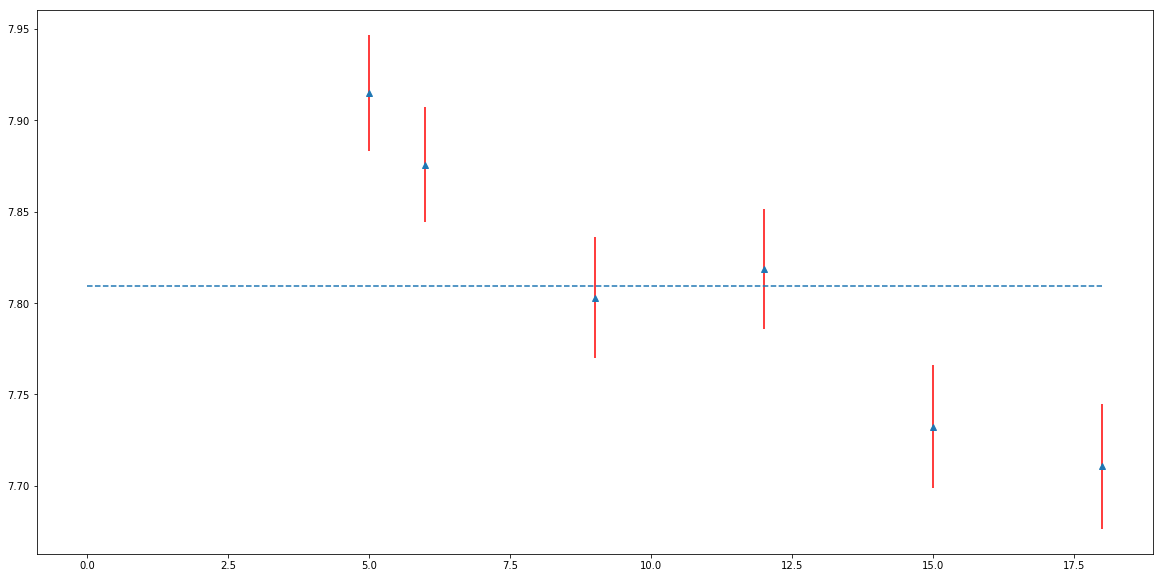

In [17]:
#Gain = [5,6,9,12,15,18,21,24,28,32]
Gain= [5,6,9,12,15,18]
print(OOS_Resolutions)
print(OOS_Errors)
median = np.mean(OOS_Resolutions)
maximum = max(Gain)
fig = plt.figure(figsize=(20,10))
plt.errorbar(Gain, OOS_Resolutions, yerr=OOS_Errors, fmt='^', ecolor='red')
plt.plot([0,maximum], [median, median], '--')
plt.show()

# NEW GAIN

In [4]:
OOS_Resolutions = []
OOS_Errors = []

# Seventh spectrum

92
integral 158474
 FCN=584.294 FROM MIGRAD    STATUS=CONVERGED    1274 CALLS        1275 TOTAL
                     EDM=4.68393e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.45160e+04   5.70432e+01   7.63600e-01   2.90621e-07
   2  p1           9.11915e+01   1.06345e-02   1.76308e-04   3.93980e-03
   3  p2           4.36737e+00   1.25581e-02   1.61615e-04   1.85365e-03
   4  p3          -2.02723e+01   2.33095e-01   6.22696e-04   1.28614e-03
   5  p4           2.68473e+03   2.43629e+01   6.44878e-02   1.10879e-05
                               ERR DEF= 0.5


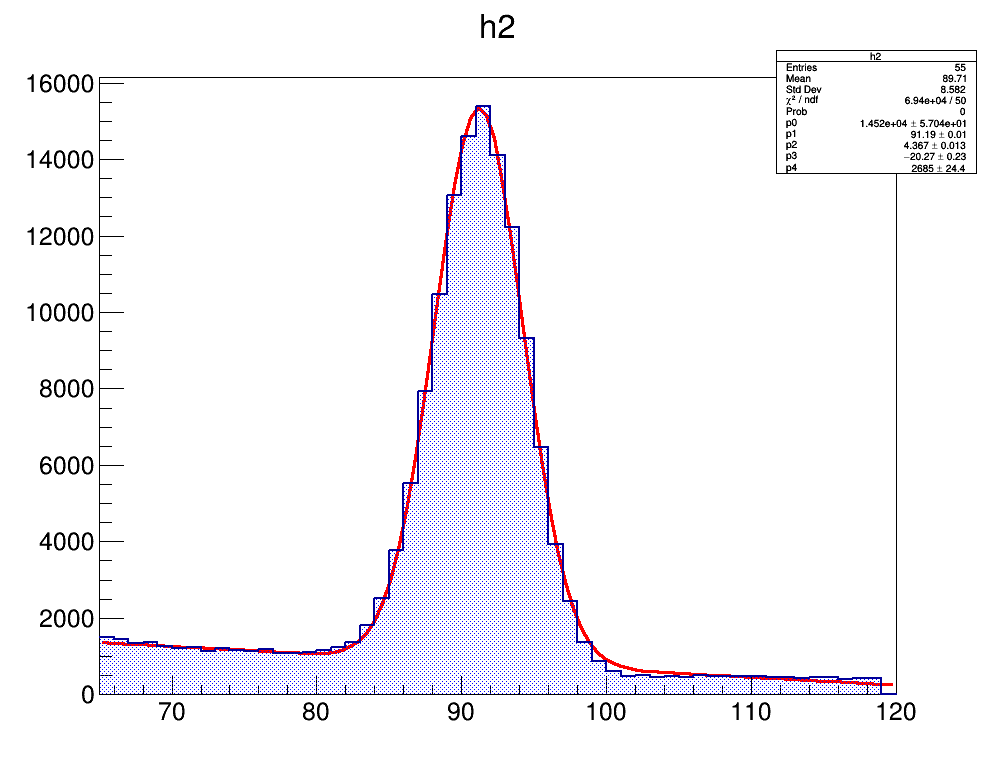

In [5]:
f = open("/Users/boldrinicoder/lab4/data/{}/{}20.txt".format(data,data), "r")
lists = f.readlines()
value = []
for i in lists:
    value.append(i.strip())
value = list(map(int,value))


sup = 120
inf = 65
bins = sup-inf
peak = value.index(max(value))
print(peak)
h2 = r.TH1F("h2", "h2", bins, inf, sup)
h2.SetFillColor(r.kBlue)
h2.SetFillStyle(3003)
h2.SetLineWidth(2)
i = inf
z = 0
fit = r.TF1("fit", "[0]*exp(-((x[0]-[1])^2)/[2]^2)+[3]*x[0]+[4]",inf,sup)
fit.SetParameters(2200,354,18,0,1)
fit.SetLineWidth(3)
while i < sup:
    h2.SetBinContent(z,value[i])
    i += 1 
    z += 1
integral = 0
for i in value[inf:sup]:
    integral += i
print("integral {}".format(integral))
c2 = r.TCanvas("c2", "c2",50,50,1000,800)
h2.Fit("fit", "RL")
h2.Draw("histo same")
r.gStyle.SetOptStat(1111)
r.gStyle.SetOptFit(1111)
c2.Draw()

In [6]:
fwhm = FWHM(fit)
Res = Resolution(fit)
Err = Res_Error(fit,fwhm)
print("Resolution = {} pm {}".format(Res,Err))
OOS_Resolutions.append(Res)
OOS_Errors.append(Err)

Resolution = 7.974648969922388 pm 0.03244423471647211


# Twelth spectrum

110
integral 171015
 FCN=956.409 FROM MIGRAD    STATUS=CONVERGED    1024 CALLS        1025 TOTAL
                     EDM=2.48196e-10    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   0.7 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.21376e+04   4.84673e+01   3.66430e-02   4.54496e-07
   2  p1           1.09692e+02   1.27517e-02   5.76008e-06  -2.23969e-04
   3  p2          -5.18507e+00   1.48940e-02   1.88678e-05  -9.30317e-05
   4  p3          -1.79055e+01   1.52748e-01  -4.08033e-05   1.64736e-04
   5  p4           2.69715e+03   1.84399e+01   4.08635e-03   1.26764e-06
                               ERR DEF= 0.5


Warning in <TROOT::Append>: Replacing existing TH1: h2 (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2


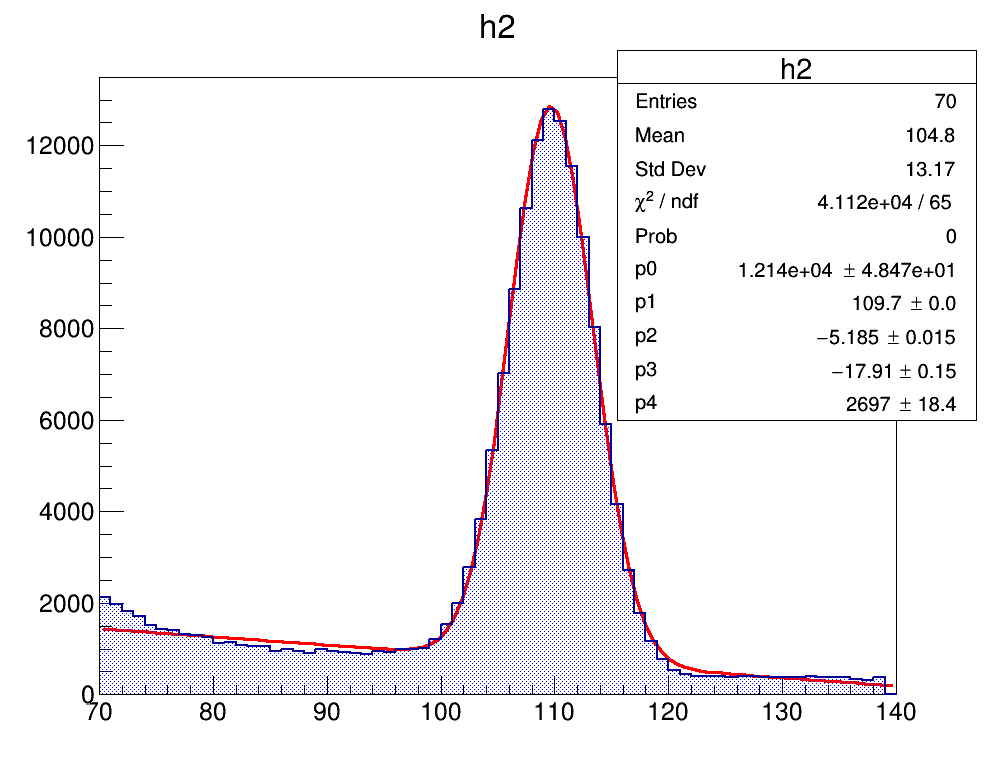

In [7]:
f = open("/Users/boldrinicoder/lab4/data/{}/{}21.txt".format(data,data), "r")
lists = f.readlines()
value = []
for i in lists:
    value.append(i.strip())
value = list(map(int,value))


sup = 140
inf = 70
bins = sup-inf
peak = value.index(max(value))
print(peak)
h2 = r.TH1F("h2", "h2", bins, inf, sup)
h2.SetFillColor(r.kBlue)
h2.SetFillStyle(3003)
h2.SetLineWidth(2)
i = inf
z = 0
fit = r.TF1("fit", "[0]*exp(-((x[0]-[1])^2)/[2]^2)+[3]*x[0]+[4]",inf,sup)
fit.SetParameters(2200,354,18,0,1)
fit.SetLineWidth(3)
while i < sup:
    h2.SetBinContent(z,value[i])
    i += 1 
    z += 1
integral = 0
for i in value[inf:sup]:
    integral += i
print("integral {}".format(integral))
c2 = r.TCanvas("c2", "c2",50,50,1000,800)
h2.Fit("fit", "RL")
h2.Draw("histo same")
r.gStyle.SetOptStat(1111)
r.gStyle.SetOptFit(1111)
c2.Draw()

In [8]:
fwhm = FWHM(fit)
Res = Resolution(fit)
Err = Res_Error(fit,fwhm)
print("Resolution = {} pm {}".format(Res,Err))
OOS_Resolutions.append(Res)
OOS_Errors.append(Err)

Resolution = 7.870913983273261 pm 0.03198919014215703


# Thriteenth spectrum

164
integral 160440
 FCN=412.132 FROM MIGRAD    STATUS=CONVERGED    1156 CALLS        1157 TOTAL
                     EDM=6.57333e-07    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   4.3 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           8.68488e+03   3.35474e+01   5.26151e-01   2.18300e-05
   2  p1           1.62950e+02   1.85103e-02   2.07162e-04   1.77361e-02
   3  p2           7.78258e+00   2.31042e-02  -1.35126e-04   5.14593e-02
   4  p3          -7.76916e+00   1.06406e-01   2.18478e-03   4.21832e-03
   5  p4           1.74056e+03   1.86272e+01  -3.36491e-01   5.22603e-05
                               ERR DEF= 0.5


Warning in <TROOT::Append>: Replacing existing TH1: h2 (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2


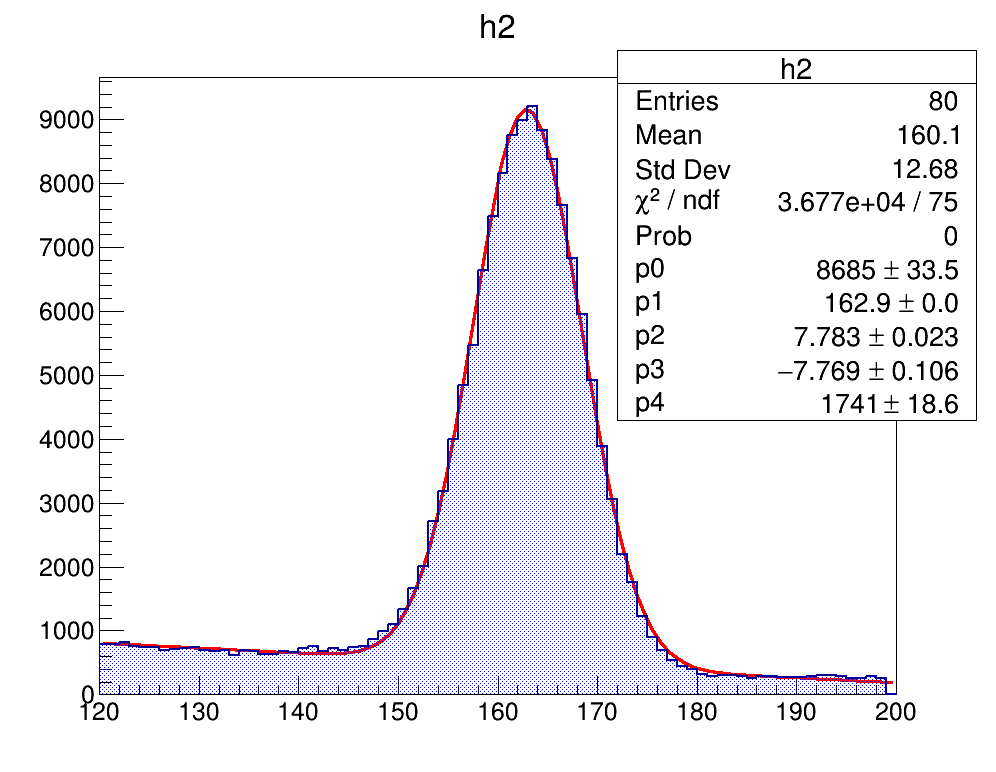

In [9]:
f = open("/Users/boldrinicoder/lab4/data/{}/{}22.txt".format(data,data), "r")
lists = f.readlines()
value = []
for i in lists:
    value.append(i.strip())
value = list(map(int,value))


sup = 200
inf = 120
bins = sup-inf
peak = value.index(max(value))
print(peak)
h2 = r.TH1F("h2", "h2", bins, inf, sup)
h2.SetFillColor(r.kBlue)
h2.SetFillStyle(3003)
h2.SetLineWidth(2)
i = inf
z = 0
fit = r.TF1("fit", "[0]*exp(-((x[0]-[1])^2)/[2]^2)+[3]*x[0]+[4]",inf,sup)
fit.SetParameters(2200,354,18,0,1)
fit.SetLineWidth(3)
while i < sup:
    h2.SetBinContent(z,value[i])
    i += 1 
    z += 1
integral = 0
for i in value[inf:sup]:
    integral += i
print("integral {}".format(integral))
c2 = r.TCanvas("c2", "c2",50,50,1000,800)
h2.Fit("fit", "RL")
h2.Draw("histo same")
r.gStyle.SetOptStat(1111)
r.gStyle.SetOptFit(1111)
c2.Draw()

In [10]:
fwhm = FWHM(fit)
Res = Resolution(fit)
Err = Res_Error(fit,fwhm)
print("Resolution = {} pm {}".format(Res,Err))
OOS_Resolutions.append(Res)
OOS_Errors.append(Err)

Resolution = 7.952752569988768 pm 0.03340305011798401


# 15 spectrum

262
integral 147252
 FCN=300.429 FROM MIGRAD    STATUS=CONVERGED     392 CALLS         393 TOTAL
                     EDM=1.02504e-08    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   1.2 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           5.14194e+03   2.01596e+01  -2.23117e-02   6.68116e-07
   2  p1           2.61076e+02   3.00628e-02   5.93359e-07   6.39081e-04
   3  p2           1.24023e+01   3.61746e-02   1.89419e-05  -8.27822e-04
   4  p3          -2.81193e+00   4.40640e-02   6.48047e-05   1.56793e-02
   5  p4           1.01243e+03   1.24896e+01  -1.54598e-02   4.85331e-05
                               ERR DEF= 0.5


Warning in <TROOT::Append>: Replacing existing TH1: h2 (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2


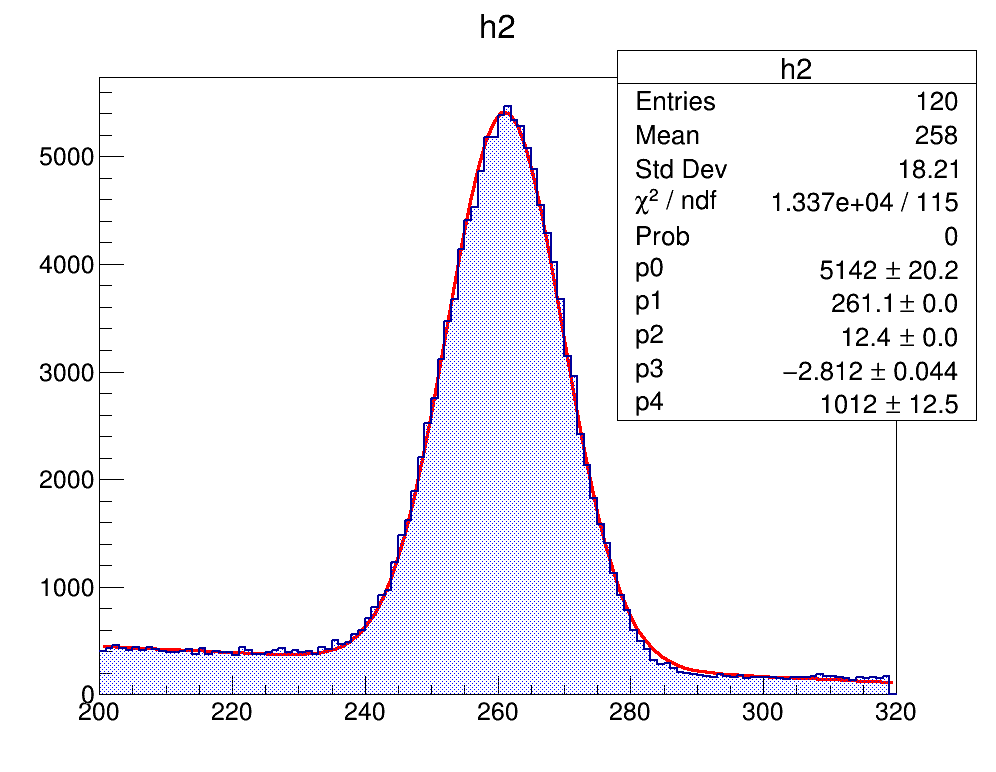

In [11]:
f = open("/Users/boldrinicoder/lab4/data/{}/{}24.txt".format(data,data), "r")
lists = f.readlines()
value = []
for i in lists:
    value.append(i.strip())
value = list(map(int,value))


sup = 320
inf = 200
bins = sup-inf
peak = value.index(max(value))
print(peak)
h2 = r.TH1F("h2", "h2", bins, inf, sup)
h2.SetFillColor(r.kBlue)
h2.SetFillStyle(3003)
h2.SetLineWidth(2)
i = inf
z = 0
fit = r.TF1("fit", "[0]*exp(-((x[0]-[1])^2)/[2]^2)+[3]*x[0]+[4]",inf,sup)
fit.SetParameters(2200,354,18,0,1)
fit.SetLineWidth(3)
while i < sup:
    h2.SetBinContent(z,value[i])
    i += 1 
    z += 1
integral = 0
for i in value[inf:sup]:
    integral += i
print("integral {}".format(integral))
c2 = r.TCanvas("c2", "c2",50,50,1000,800)
h2.Fit("fit", "RL")
h2.Draw("histo same")
r.gStyle.SetOptStat(1111)
r.gStyle.SetOptFit(1111)
c2.Draw()

In [12]:
fwhm = FWHM(fit)
Res = Resolution(fit)
Err = Res_Error(fit,fwhm)
print("Resolution = {} pm {}".format(Res,Err))
OOS_Resolutions.append(Res)
OOS_Errors.append(Err)

Resolution = 7.910046973793183 pm 0.03264353053368422


# 16 spectrum

307
integral 151654
 FCN=504.163 FROM MIGRAD    STATUS=CONVERGED     426 CALLS         427 TOTAL
                     EDM=2.26765e-09    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   1.7 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           4.37747e+03   1.73417e+01  -2.42298e-02   3.56328e-06
   2  p1           3.05374e+02   3.53429e-02  -3.20782e-05   3.85355e-04
   3  p2           1.44541e+01   4.21803e-02   3.62451e-05  -1.16304e-04
   4  p3          -1.66989e+00   2.37235e-02   1.58630e-05   8.62323e-04
   5  p4           7.56176e+02   8.33559e+00  -4.70525e-03   2.37922e-06
                               ERR DEF= 0.5


Warning in <TROOT::Append>: Replacing existing TH1: h2 (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2


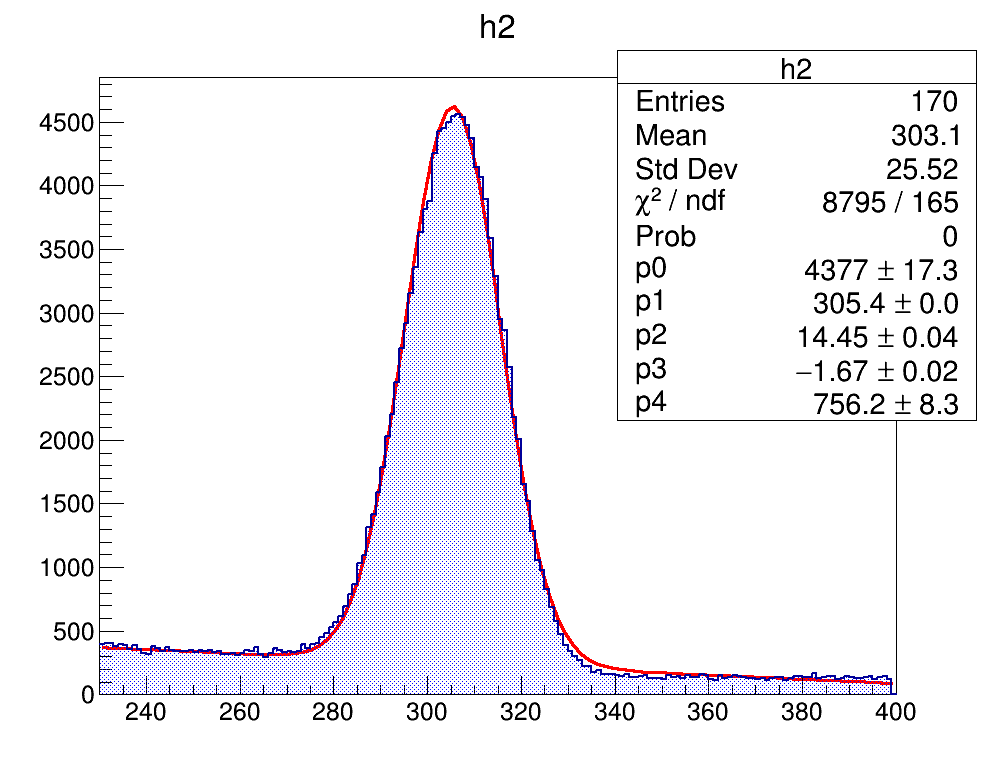

In [13]:
f = open("/Users/boldrinicoder/lab4/data/{}/{}25.txt".format(data,data), "r")
lists = f.readlines()
value = []
for i in lists:
    value.append(i.strip())
value = list(map(int,value))


sup = 400
inf = 230
bins = sup-inf
peak = value.index(max(value))
print(peak)
h2 = r.TH1F("h2", "h2", bins, inf, sup)
h2.SetFillColor(r.kBlue)
h2.SetFillStyle(3003)
h2.SetLineWidth(2)
i = inf
z = 0
fit = r.TF1("fit", "[0]*exp(-((x[0]-[1])^2)/[2]^2)+[3]*x[0]+[4]",inf,sup)
fit.SetParameters(2200,354,18,0,1)
fit.SetLineWidth(3)
while i < sup:
    h2.SetBinContent(z,value[i])
    i += 1 
    z += 1
integral = 0
for i in value[inf:sup]:
    integral += i
print("integral {}".format(integral))
c2 = r.TCanvas("c2", "c2",50,50,1000,800)
h2.Fit("fit", "RL")
h2.Draw("histo same")
r.gStyle.SetOptStat(1111)
r.gStyle.SetOptFit(1111)
c2.Draw()

In [14]:
fwhm = FWHM(fit)
Res = Resolution(fit)
Err = Res_Error(fit,fwhm)
print("Resolution = {} pm {}".format(Res,Err))
OOS_Resolutions.append(Res)
OOS_Errors.append(Err)

Resolution = 7.881418154315955 pm 0.03254160076977986


# 17 spectrum

347
integral 135040
 FCN=196.461 FROM MIGRAD    STATUS=CONVERGED     299 CALLS         300 TOTAL
                     EDM=1.02119e-08    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   1.4 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           3.90901e+03   1.50009e+01  -1.79296e-02   1.36416e-06
   2  p1           3.48740e+02   4.15732e-02   8.88770e-05  -3.37384e-03
   3  p2           1.64562e+01   5.33751e-02   1.26733e-04   4.21218e-04
   4  p3          -2.30621e+00   5.98391e-02  -4.34020e-05  -2.18020e-03
   5  p4           1.01456e+03   2.23909e+01   1.53578e-02  -3.00479e-06
                               ERR DEF= 0.5


Warning in <TROOT::Append>: Replacing existing TH1: h2 (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2


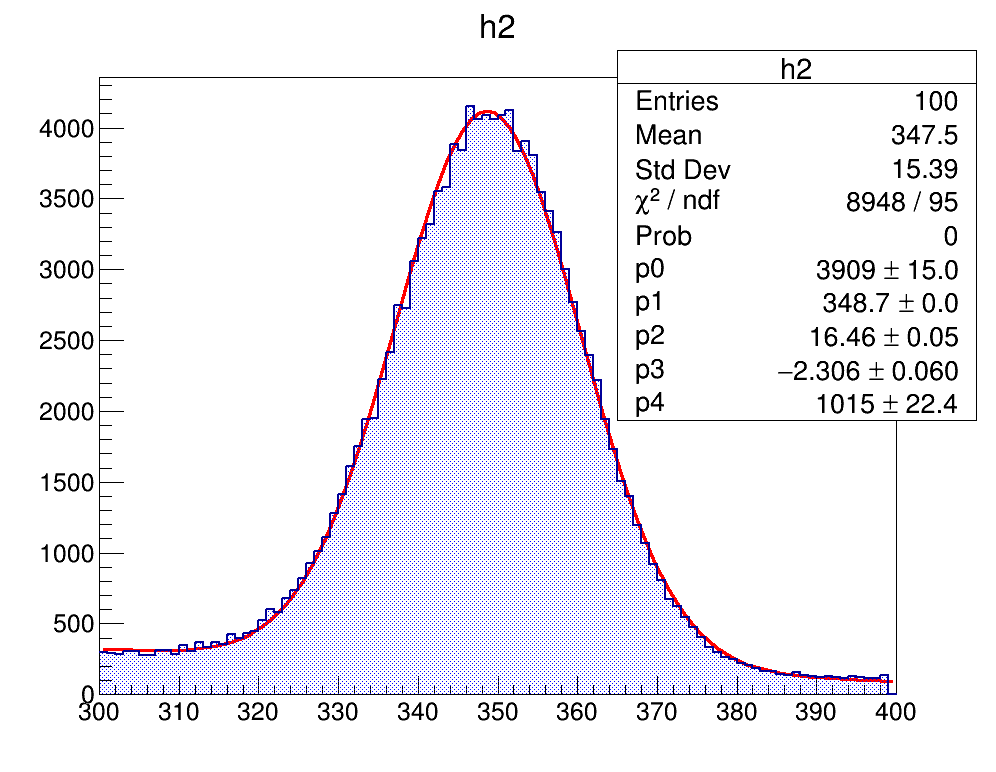

In [15]:
f = open("/Users/boldrinicoder/lab4/data/{}/{}26.txt".format(data,data), "r")
lists = f.readlines()
value = []
for i in lists:
    value.append(i.strip())
value = list(map(int,value))


sup = 400
inf = 300
bins = sup-inf
peak = value.index(max(value))
print(peak)
h2 = r.TH1F("h2", "h2", bins, inf, sup)
h2.SetFillColor(r.kBlue)
h2.SetFillStyle(3003)
h2.SetLineWidth(2)
i = inf
z = 0
fit = r.TF1("fit", "[0]*exp(-((x[0]-[1])^2)/[2]^2)+[3]*x[0]+[4]",inf,sup)
fit.SetParameters(2200,354,18,0,1)
fit.SetLineWidth(3)
while i < sup:
    h2.SetBinContent(z,value[i])
    i += 1 
    z += 1
integral = 0
for i in value[inf:sup]:
    integral += i
print("integral {}".format(integral))
c2 = r.TCanvas("c2", "c2",50,50,1000,800)
h2.Fit("fit", "RL")
h2.Draw("histo same")
r.gStyle.SetOptStat(1111)
r.gStyle.SetOptFit(1111)
c2.Draw()

In [16]:
fwhm = FWHM(fit)
Res = Resolution(fit)
Err = Res_Error(fit,fwhm)
print("Resolution = {} pm {}".format(Res,Err))
OOS_Resolutions.append(Res)
OOS_Errors.append(Err)

Resolution = 7.85726374370842 pm 0.03605580395827042


# 18 spectrum

392
integral 141387
 FCN=199.051 FROM MIGRAD    STATUS=CONVERGED     330 CALLS         331 TOTAL
                     EDM=1.53489e-09    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   1.7 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           3.58212e+03   1.33764e+01   9.37108e-03   3.24873e-06
   2  p1           3.92327e+02   4.50962e-02  -2.83388e-05  -8.83738e-05
   3  p2           1.87020e+01   5.57691e-02   3.43927e-05   1.29340e-03
   4  p3          -1.69018e+00   3.99881e-02   3.48427e-06   7.30441e-03
   5  p4           8.45673e+02   1.64981e+01  -5.40215e-03   1.87967e-05
                               ERR DEF= 0.5


Warning in <TROOT::Append>: Replacing existing TH1: h2 (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2


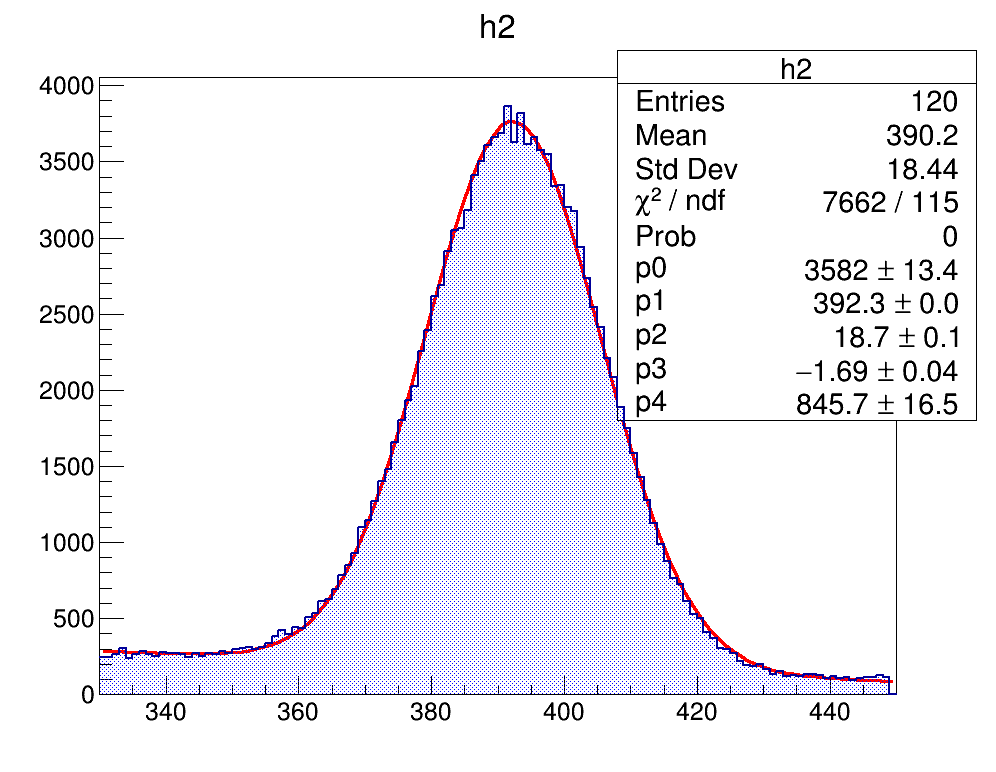

In [17]:
f = open("/Users/boldrinicoder/lab4/data/{}/{}27.txt".format(data,data), "r")
lists = f.readlines()
value = []
for i in lists:
    value.append(i.strip())
value = list(map(int,value))


sup = 450
inf = 330
bins = sup-inf
peak = value.index(max(value))
print(peak)
h2 = r.TH1F("h2", "h2", bins, inf, sup)
h2.SetFillColor(r.kBlue)
h2.SetFillStyle(3003)
h2.SetLineWidth(2)
i = inf
z = 0
fit = r.TF1("fit", "[0]*exp(-((x[0]-[1])^2)/[2]^2)+[3]*x[0]+[4]",inf,sup)
fit.SetParameters(2200,354,18,0,1)
fit.SetLineWidth(3)
while i < sup:
    h2.SetBinContent(z,value[i])
    i += 1 
    z += 1
integral = 0
for i in value[inf:sup]:
    integral += i
print("integral {}".format(integral))
c2 = r.TCanvas("c2", "c2",50,50,1000,800)
h2.Fit("fit", "RL")
h2.Draw("histo same")
r.gStyle.SetOptStat(1111)
r.gStyle.SetOptFit(1111)
c2.Draw()

In [18]:
fwhm = FWHM(fit)
Res = Resolution(fit)
Err = Res_Error(fit,fwhm)
print("Resolution = {} pm {}".format(Res,Err))
OOS_Resolutions.append(Res)
OOS_Errors.append(Err)

Resolution = 7.937514346635423 pm 0.033488679521518926


# 19 spectrum

501
integral 148229
 FCN=293.677 FROM MIGRAD    STATUS=CONVERGED     351 CALLS         352 TOTAL
                     EDM=2.44865e-10    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   1.1 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           2.81424e+03   1.07691e+01  -3.31480e-03  -5.80877e-07
   2  p1           4.99791e+02   5.61523e-02  -2.72136e-05   3.48098e-04
   3  p2           2.35466e+01   6.94323e-02   2.10760e-05  -6.28099e-06
   4  p3          -7.94506e-01   1.56425e-02   1.87319e-05   2.42712e-03
   5  p4           5.49873e+02   8.40535e+00  -1.14007e-02   3.32893e-06
                               ERR DEF= 0.5


Warning in <TROOT::Append>: Replacing existing TH1: h2 (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2


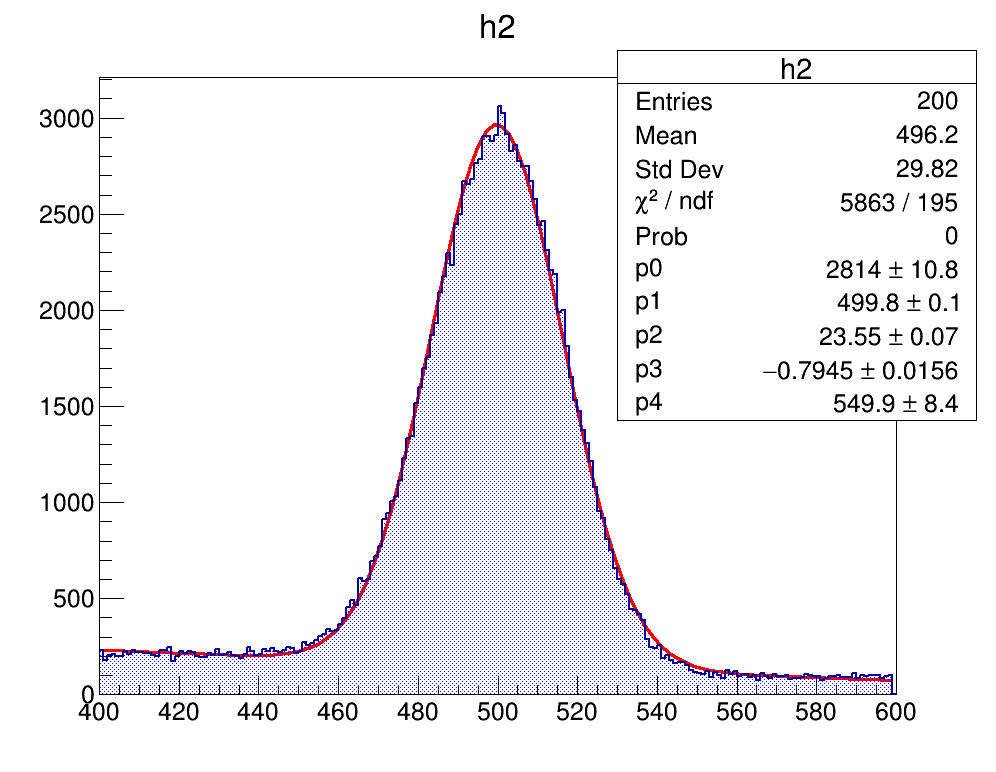

In [19]:
f = open("/Users/boldrinicoder/lab4/data/{}/{}28.txt".format(data,data), "r")
lists = f.readlines()
value = []
for i in lists:
    value.append(i.strip())
value = list(map(int,value))


sup = 600
inf = 400
bins = sup-inf
peak = value.index(max(value))
print(peak)
h2 = r.TH1F("h2", "h2", bins, inf, sup)
h2.SetFillColor(r.kBlue)
h2.SetFillStyle(3003)
h2.SetLineWidth(2)
i = inf
z = 0
fit = r.TF1("fit", "[0]*exp(-((x[0]-[1])^2)/[2]^2)+[3]*x[0]+[4]",inf,sup)
fit.SetParameters(2200,354,18,0,1)
fit.SetLineWidth(3)
while i < sup:
    h2.SetBinContent(z,value[i])
    i += 1 
    z += 1
integral = 0
for i in value[inf:sup]:
    integral += i
print("integral {}".format(integral))
c2 = r.TCanvas("c2", "c2",50,50,1000,800)
h2.Fit("fit", "RL")
h2.Draw("histo same")
r.gStyle.SetOptStat(1111)
r.gStyle.SetOptFit(1111)
c2.Draw()

In [20]:
fwhm = FWHM(fit)
Res = Resolution(fit)
Err = Res_Error(fit,fwhm)
print("Resolution = {} pm {}".format(Res,Err))
OOS_Resolutions.append(Res)
OOS_Errors.append(Err)

Resolution = 7.844835288223858 pm 0.03272814969119962


8
8 [7.974648969922388, 7.870913983273261, 7.952752569988768, 7.910046973793183, 7.881418154315955, 7.85726374370842, 7.937514346635423, 7.844835288223858]
8 [0.03244423471647211, 0.03198919014215703, 0.03340305011798401, 0.03264353053368422, 0.03254160076977986, 0.03605580395827042, 0.033488679521518926, 0.03272814969119962]


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2
Info in <TCanvas::Print>: pdf file /Users/boldrinicoder/Desktop/GainConsistency1.pdf has been created


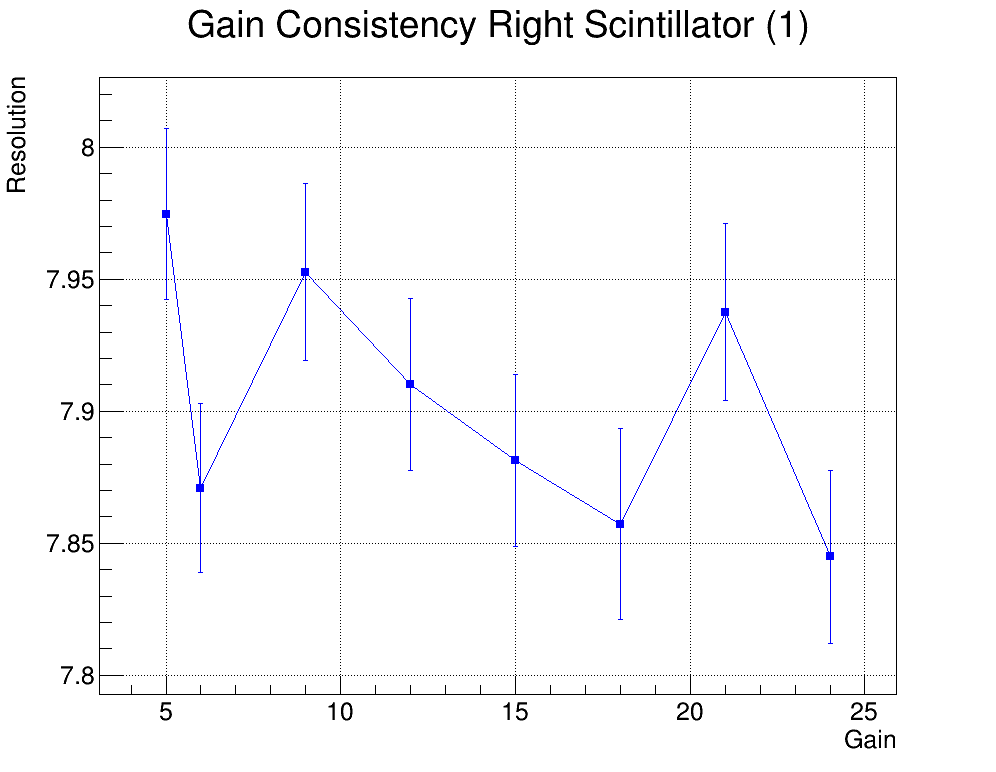

In [21]:
from array import array
print(len(OOS_Resolutions))
Gain= [5,6,9,12,15,18,21,24]
err_gain = array('f', np.zeros(len(Gain)))
print(len(OOS_Resolutions), OOS_Resolutions)
print(len(OOS_Errors), OOS_Errors)
OOS_Resolutions = array('f', OOS_Resolutions)
OOS_Errors = array('f', OOS_Errors)
Gain = array('f', Gain)
g = r.TGraphErrors(len(Gain), Gain, OOS_Resolutions, err_gain, OOS_Errors)
g.SetTitle("Gain Consistency Right Scintillator (1)")
g.GetXaxis().SetTitle("Gain")
g.GetYaxis().SetTitle("Resolution")
g.SetMarkerStyle(21)
g.SetMarkerColor(4)
g.SetLineColor(4)
c2 = r.TCanvas("c2", "c2", 50,50, 1000,800)
c2.SetGridx()
c2.SetGridy()
g.Draw("APL")
c2.Draw()
c2.SaveAs("/Users/boldrinicoder/Desktop/GainConsistency1.pdf", "pdf")

8
[8.032045956952565, 7.964780093693403, 7.952753132304707, 7.91004697383331, 7.881418154315865, 7.8572637437057375, 7.937514346635699, 7.844835288227256]
[0.03411406488910454, 0.03268315830512017, 0.031986804002495664, 0.03264503664729842, 0.03254161424115445, 0.03605584666199057, 0.03348867176598719, 0.032728146092533425]


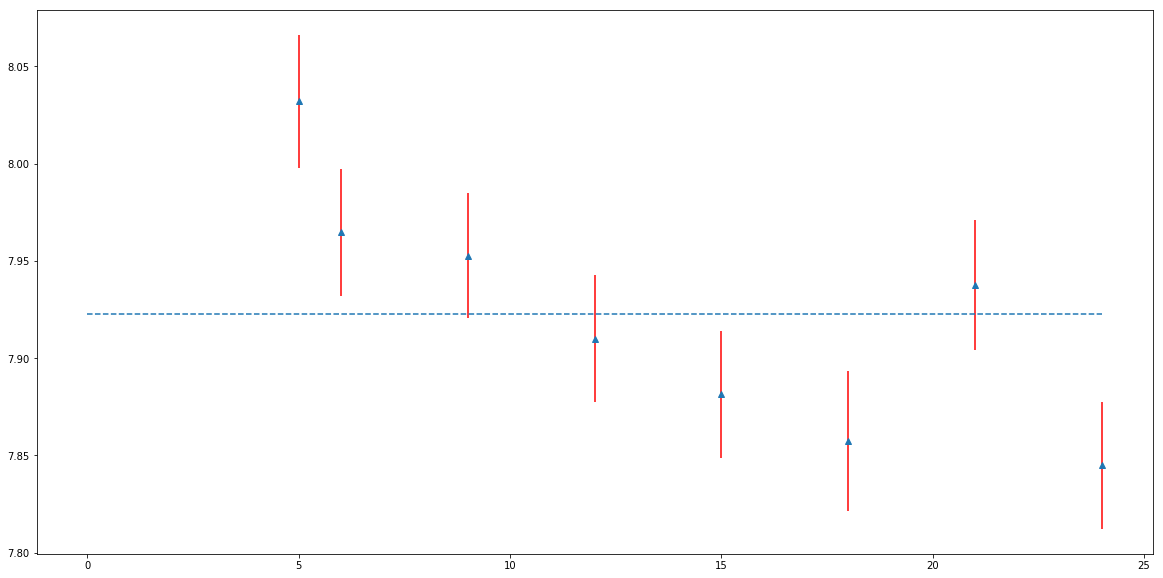

In [36]:
#Gain = [5,6,9,12,15,18,21,24,28,32]
print(len(OOS_Resolutions))
Gain= [5,6,9,12,15,18,21,24]
print(OOS_Resolutions)
print(OOS_Errors)
median = np.mean(OOS_Resolutions)
maximum = max(Gain)
fig = plt.figure(figsize=(20,10))
plt.errorbar(Gain, OOS_Resolutions, yerr=OOS_Errors, fmt='^', ecolor='red')
plt.plot([0,maximum], [median, median], '--')
plt.show()

In [32]:
"""
Next step: TGraphErrors with a linear interpolation to see the actual linearity!
"""

'\nNext step: TGraphErrors with a linear interpolation to see the actual linearity!\n'

In [22]:
l = [1,2,3,4,5]
l[2:]

[3, 4, 5]